# <FONT size="10pt"> <center>Projet 3</center></FONT>


### Notebook 1

#### <FONT size="10pt"> <center>Préparez des données pour un organisme de santé publique</center></FONT>



**Openclassroom** : https://openclassrooms.com/fr/paths/793/projects/1500/assignment

- L'agence **Santé publique France** souhaite améliorer sa base de données Open Food Facts et fait appel aux services de votre entreprise. Cette base de données open source est mise à la disposition de particuliers et d’organisations afin de leur permettre de connaître la qualité nutritionnelle de produits. 

**Les données:**

- Le jeu de données Open Food Facts est disponible sur le site officie: https://world.openfoodfacts.org/

- Lien descriptif des différents champs de nos données: https://world.openfoodfacts.org/data/data-fields.txt

- Les champs sont séparés en quatre sections :
    - Les informations générales sur la fiche du produit : nom, date de modification, etc.
    - Un ensemble de tags : catégorie du produit, localisation, origine, etc.
    - Les ingrédients composant les produits et leurs additifs éventuels.
    - Des informations nutritionnelles : quantité en grammes d’un nutriment pour 100 grammes du produit.

**Votre mission:**

1) Traiter le jeu de données.

Repérer des variables pertinentes pour les traitements à venir, et nécessaires pour suggérer des valeurs manquantes,.
Nettoyer les données en :
mettant en évidence les éventuelles valeurs manquantes parmi les variables pertinentes sélectionnées, avec au moins 3 méthodes de traitement adaptées aux variables concernées,
identifiant et en traitant les éventuelles valeurs aberrantes de chaque variable.
Automatiser ces traitements pour éviter de répéter ces opérations
Attention, le client souhaite que le programme fonctionne si la base de données est légèrement modifiée (ajout d’entrées, par exemple) !

2) Tout au long de l’analyse, produire des visualisations afin de mieux comprendre les données. Effectuer une analyse univariée pour chaque variable intéressante, afin de synthétiser son comportement.

Et un mot à ce sujet : le client nous demande de réaliser une présentation qui permet d’expliquer les analyses faites à un public néophyte. Sois donc attentif à la lisibilité : taille des textes, choix des couleurs, netteté suffisante, et variez les graphiques (boxplots, histogrammes, diagrammes circulaires, nuages de points…) pour illustrer au mieux ton propos.

3) Sélectionner / créer des variables à l’aide d’une analyse multivariée. Effectuer les tests statistiques appropriés pour vérifier la significativité des résultats.

4) Rédiger un rapport d’exploration et une conclusion pour expliquer la faisabilité de l’application demandée.

5) Même si les données n’incluent pas de données personnelles, on doit expliquer dans une présentation en quoi ce projet respecte les 5 grands principes du RGPD. Santé publique France aimerait publier quelque chose sur le site Open Food Facts pour couper court aux questions sur le respect des RGPD que nous recevons parfois. 

**Ce fichier décrit les champs issus de l'export CSV des produits dans la base de données Open Food Facts.**

Voir https://world.openfoodfacts.org/data pour plus d'informations.

Le codage du fichier est Unicode UTF-8. Le caractère qui sépare les champs est <tab> (tabulation).

Généralités :

- les champs qui se terminent par _t sont des dates au format d'horodatage UNIX (nombre de secondes depuis le 1er janvier 1970)
- les champs qui se terminent par _datetime sont des dates au format iso8601 : aaaa-mm-jjThh:mn:ssZ
- les champs qui se terminent par _tags sont une liste de balises séparées par des virgules (par exemple,category_tags est l'ensemble des balises normalisées par ordinateur du champ catégories)
- les champs qui se terminent par un code de langue à 2 lettres (par exemple fr pour le français) sont l'ensemble des balises dans cette langue
- les champs qui se terminent par _100g correspondent à la quantité d'un nutriment (en g, ou kJ pour l'énergie) pour 100 g ou 100 ml de produit
- les champs qui se terminent par _serving correspondent à la quantité d'un nutriment (en g, ou kJ pour l'énergie) pour 1 portion du produit

## I- IMPORTATION DES LIBRAIRIES ET DES DONNEES

In [428]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import random
import colorcet as cc
from sklearn.impute import KNNImputer
import re
from textblob import TextBlob
# from deepl import Deepl
# from mttranslate import translate
from googletrans import Translator
import googletrans
from google_trans_new import google_translator 
import math
from tqdm import tqdm
import random
import missingno as msno
import scipy
import plotly
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
import plotly.express as px
import plotly.graph_objects as go
import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier, KDTree
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
import statistics
import sys
import unicodedata
from datetime import datetime
from time import time
pd.set_option('mode.chained_assignment', None) # Pour éviter la survenue de messages d'erreur lors de la création
                                                 # d'un nouveau dataframe à partir d'un existant
from warnings import filterwarnings
filterwarnings('ignore')  # code optionnel

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 1000)

In [429]:
df_openfoodfacts = pd.read_csv("fr_openfoodfacts.org.products.csv", sep='\t', error_bad_lines=False)
df_openfoodfacts.head(3)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,3087,http://world-fr.openfoodfacts.org/produit/0000000003087/farine-de-ble-noir-ferme-t-y-r-nao,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,NaN,NaN,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-completed, en:ingredients-to-be-completed, en:expiration-date-to-be-completed, en:characteristics-to-be-completed, en:categories-to-be-completed, en:brands-completed, en:packaging-to-be-completed, en:quantity-completed, en:product-name-completed, en:photos-to-be-validated, en:photos-uploaded","en:to-be-completed,en:nutrition-facts-to-be-completed,en:ingredients-to-be-completed,en:expiration-date-to-be-completed,en:characteristics-to-be-completed,en:categories-to-be-completed,en:brands-completed,en:packaging-to-be-completed,en:quantity-completed,en:product-name-completed,en:photos-to-be-validated,en:photos-uploaded","A compléter,Informations nutritionnelles à compléter,Ingrédients à compléter,Date limite à compléter,Caractéristiques à compléter,Catégories à compléter,Marques complétées,Emballage à compléter,Quantité complétée,Nom du produit complete,Photos à valider,Photos envoyées",NaN,NaN,NaN,N

### 1- Observation, sélection et élaboration d'un dictionnaire des variables.

In [430]:
def shape_data(df):
    lignes = df.shape[0]
    colonnes = df.shape[1]
    print(f"Nous observons {lignes} lignes et {colonnes} colonnes.")

In [431]:
shape_precleaning = shape_data(df_openfoodfacts)

print(shape_precleaning)

Nous observons 320772 lignes et 162 colonnes.
None


- **Nous pouvons remarqué que notre DataFrrme contient 320772 lignes et 162 colonnes**
- **Nous alons observer maintenant à quoi ressemble nos variables**

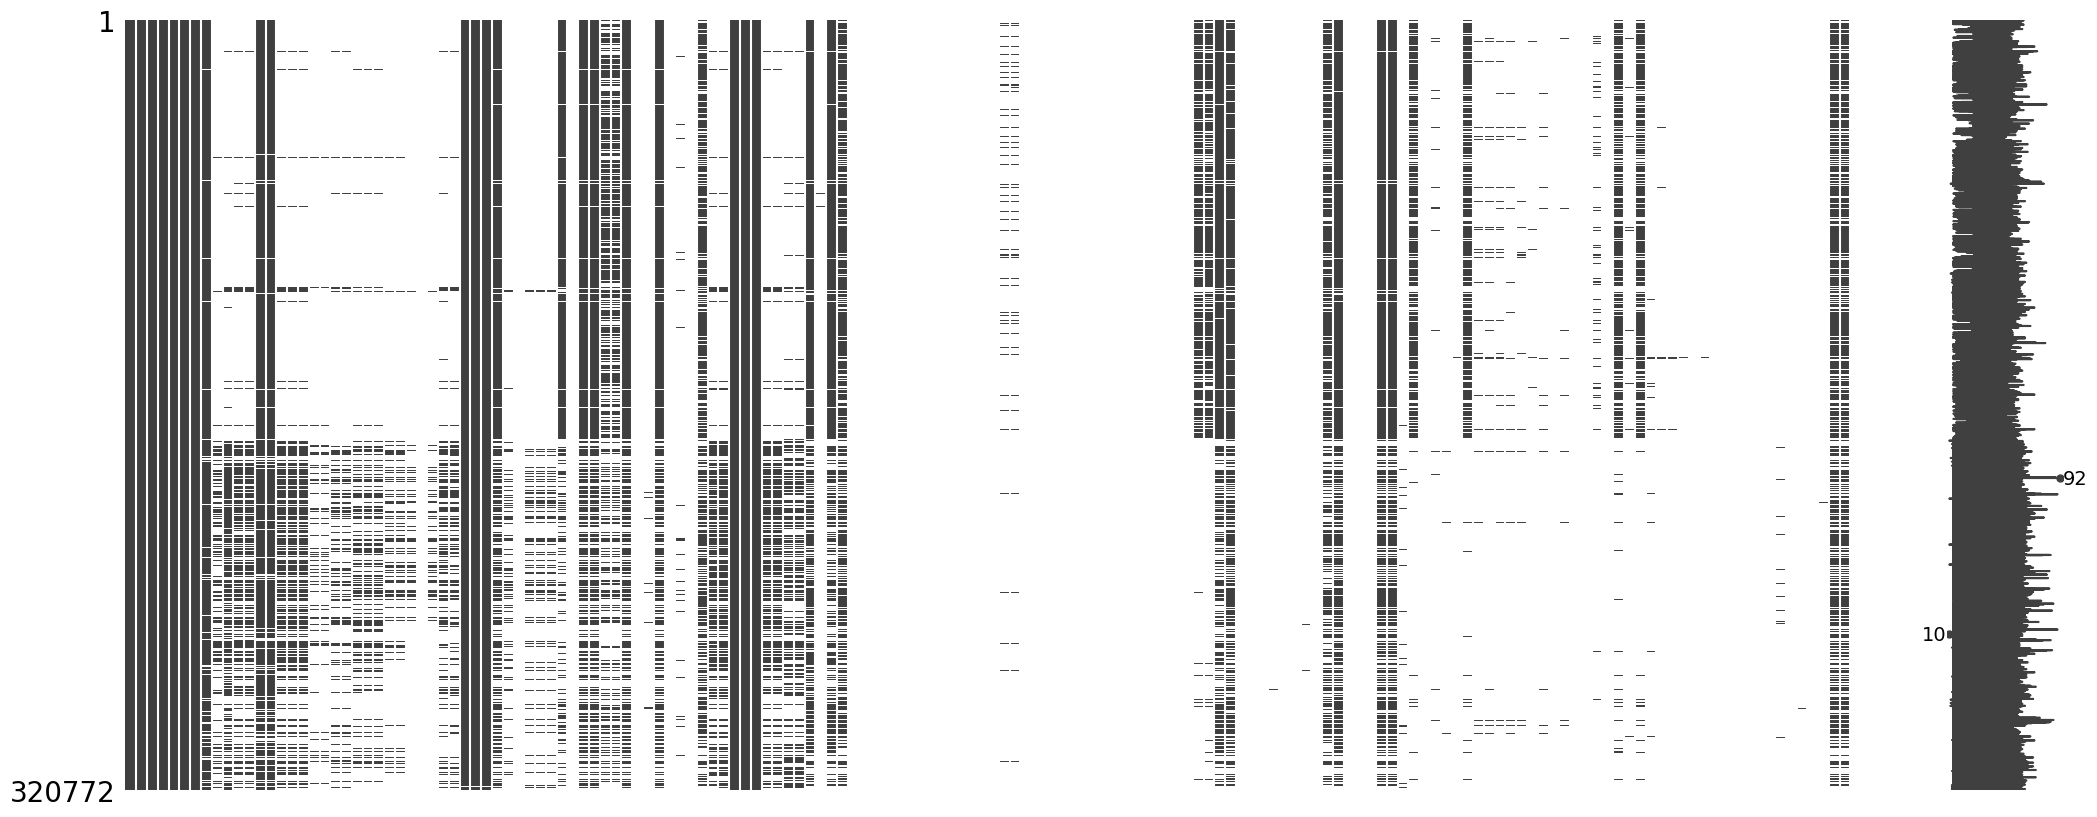

In [432]:
# Visualisation du remplissage avec missingo
msno.matrix(df_openfoodfacts)
plt.show()

In [433]:
# Création d'un dictionnaire avec les données à insérer dans le DataFrame
donnees_nettoyage = {
    'Etapes': ["Etape 1"],
    'Action': ['Ouverture du Fichier'],
    'Nb_Colonne': [df_openfoodfacts.shape[1]],
    'Nb_Ligne': [df_openfoodfacts.shape[0]],
    'Pourcentage_NaN': [round((df_openfoodfacts.isna().sum().sum())*100/(df_openfoodfacts.shape[0]*df_openfoodfacts.shape[1]))]
}

# Création du DataFrame à partir du dictionnaire
df_processus_nettoyage = pd.DataFrame.from_dict(donnees_nettoyage)
df_processus_nettoyage

,Etapes,Action,Nb_Colonne,Nb_Ligne,Pourcentage_NaN
0,Etape 1,Ouverture du Fichier,162,320772,76


In [434]:
df_openfoodfacts.dtypes

code                                           object
url                                            object
creator                                        object
created_t                                      object
created_datetime                               object
last_modified_t                                object
last_modified_datetime                         object
product_name                                   object
generic_name                                   object
quantity                                       object
packaging                                      object
packaging_tags                                 object
brands                                         object
brands_tags                                    object
categories                                     object
categories_tags                                object
categories_fr                                  object
origins                                        object
origins_tags                

In [435]:
# Colonnes à ne pas supprimer même si elles ont moins de 50% de valeurs non nulles
colonnes_a_garder = ['pnns_groups_1', 'pnns_groups_2']

# Calculer le seuil de remplissage à 50%
seuil = len(df_openfoodfacts) * 0.5

# Créer une liste des colonnes à supprimer
colonnes_a_supprimer = [col for col in df_openfoodfacts.columns if col not in colonnes_a_garder
                        and df_openfoodfacts[col].count() < seuil]

# Supprimer les colonnes
df_openfoodfacts = df_openfoodfacts.drop(columns=colonnes_a_supprimer)

#df_openfoodfacts.head(3)

In [436]:
"""
# Calculer le seuil de remplissage à 50%
seuil = len(df_openfoodfacts) * 0.5

# Filtrer les colonnes qui ont au moins le seuil de non-null
df_openfoodfacts = df_openfoodfacts.dropna(axis=1, thresh=seuil)

df_openfoodfacts.head(3)
"""

'\n# Calculer le seuil de remplissage à 50%\nseuil = len(df_openfoodfacts) * 0.5\n\n# Filtrer les colonnes qui ont au moins le seuil de non-null\ndf_openfoodfacts = df_openfoodfacts.dropna(axis=1, thresh=seuil)\n\ndf_openfoodfacts.head(3)\n'

In [437]:
df_openfoodfacts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Data columns (total 36 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   code                                     320749 non-null  object 
 1   url                                      320749 non-null  object 
 2   creator                                  320770 non-null  object 
 3   created_t                                320769 non-null  object 
 4   created_datetime                         320763 non-null  object 
 5   last_modified_t                          320772 non-null  object 
 6   last_modified_datetime                   320772 non-null  object 
 7   product_name                             303010 non-null  object 
 8   brands                                   292360 non-null  object 
 9   brands_tags                              292352 non-null  object 
 10  countries                       

## II- Analyse des valeurs manquantes

In [438]:
# Calcul du nombre total de valeurs manquantes dans le DataFrame
total_nans = df_openfoodfacts.isna().sum().sum()

# Calcul du nombre total de cases dans le DataFrame
total_cases = df_openfoodfacts.shape[0] * df_openfoodfacts.shape[1]

# Affichage du nombre total de valeurs manquantes et de cases, ainsi que le pourcentage de valeurs manquantes
print(f"Nous observons {total_nans} NaNs dans toute la DataFrame.")
print(f"Nous observons {total_cases} cases dans la DataFrame.")
print(f"Pourcentage de NaNs dans la DataFrame : {round((total_nans / total_cases) * 100)}%")

Nous observons 1990525 NaNs dans toute la DataFrame.
Nous observons 11547792 cases dans la DataFrame.
Pourcentage de NaNs dans la DataFrame : 17%


- **Nous pouvons voir que 14% des données sont manquantes dans notre jeu de données.**

In [439]:
# Processus de néttoyage
# Création d'une liste contenant les informations de l'étape 2
etape2 = ['Etape 2', "Suppression des colonnes ayant moins de 50% de leur valeur rempli, sauf 'pnns_groups_1', 'pnns_groups_2'", df_openfoodfacts.shape[1], 
          df_openfoodfacts.shape[0], # Nombre total de colonnes avant la suppression
          round((df_openfoodfacts.isna().sum().sum())*100/(df_openfoodfacts.shape[0]*df_openfoodfacts.shape[1]))]   # Calcul du pourcentage de NaN

# Conversion de la liste en DataFrame avec les bonnes colonnes
etape2 = pd.DataFrame([etape2], columns=['Etapes', 'Action', 'Nb_Colonne', 'Nb_Ligne', 'Pourcentage_NaN'])

# Ajout de l'étape au DataFrame df_processus_nettoyage
df_processus_nettoyage = df_processus_nettoyage.append(etape2, ignore_index=True)

# Afficher le DataFrame mis à jour
df_processus_nettoyage

,Etapes,Action,Nb_Colonne,Nb_Ligne,Pourcentage_NaN
0,Etape 1,Ouverture du Fichier,162,320772,76
1,Etape 2,"Suppression des colonnes ayant moins de 50% de leur valeur rempli, sauf 'pnns_groups_1', 'pnns_groups_2'",36,320772,17


In [440]:
# Calcul du pourcentage de remplissage par colonne et tri par ordre croissant
pourcentage_remplissage_colonne = (df_openfoodfacts.notna().mean() * 100).to_frame().sort_values(0).round(4)

# Affichage des 30 premières lignes
print(pourcentage_remplissage_colonne.head(30))

# Comptage des pourcentages arrondis et leurs occurrences
count_pourcentage_arrondi = round(pourcentage_remplissage_colonne).value_counts()

# Affichage du compte des pourcentages arrondis
print(count_pourcentage_arrondi)

                                               0
pnns_groups_1                            28.5290
pnns_groups_2                            29.4574
fiber_100g                               62.6258
serving_size                             65.8820
nutrition-score-uk_100g                  68.9618
nutrition_grade_fr                       68.9618
nutrition-score-fr_100g                  68.9618
saturated-fat_100g                       71.5630
carbohydrates_100g                       75.9380
fat_100g                                 76.0325
sugars_100g                              76.3692
additives                                77.5956
ingredients_that_may_be_from_palm_oil_n  77.6062
additives_n                              77.6062
ingredients_from_palm_oil_n              77.6062
ingredients_text                         77.6134
sodium_100g                              79.6401
salt_100g                                79.6547
proteins_100g                            81.0301
energy_100g         

- **La DataFrame contient 11 colonnes depassant le seuil de remplissage de 70%.**
- **Seules 13 colonnes sont remplies à 100% ou presque.**

In [441]:
# Calcul du pourcentage de valeurs manquantes par ligne, comptage et tri des valeurs
pourcentage_valeurs_manquantes_lignes = (df_openfoodfacts.isna().mean(axis=1) * 100).round(0).value_counts().to_frame().reset_index().sort_values('index', ascending=False)

# Affichage des 5 premières lignes
top_5_pourcentage_manquantes_lignes = pourcentage_valeurs_manquantes_lignes.head(5)
top_5_pourcentage_manquantes_lignes

,index,0
24,72.0,54
25,69.0,40
26,67.0,27
6,64.0,11076
10,61.0,7712


- **Aucune ligne n'est entièrement vide à 100% dans cette DataFrame.**
- **Il y a 54 lignes avec 72% de valeurs manquantes et 40 lignes avec 69% de valeurs manquantes.**

In [442]:
# Etude du remplissage des ingrédients : 
Ingredients = df_openfoodfacts[["energy_100g","fat_100g","saturated-fat_100g","carbohydrates_100g","sugars_100g",
                                "fiber_100g","proteins_100g","salt_100g","sodium_100g","nutrition-score-fr_100g",
                                "nutrition-score-uk_100g"]]

print((Ingredients.notna().sum(axis = 1).value_counts().to_frame().reset_index().sort_values('index').head(1)[0][1]/len(df_openfoodfacts)*100).round(2))
Ingredients.notna().sum(axis = 1).value_counts().to_frame().reset_index().sort_values('index').head()

18.08


,index,0
1,0,58004
8,1,873
11,2,558
10,3,602
7,4,3795


- **Un total de 58004 lignes, représentant 18% du DataFrame, ne contient aucune information sur les ingrédients et doivent être supprimées.**

- **Il y a 873 lignes qui ne comportent qu'un seul ingrédient, tel que le sucre ou le sel.**

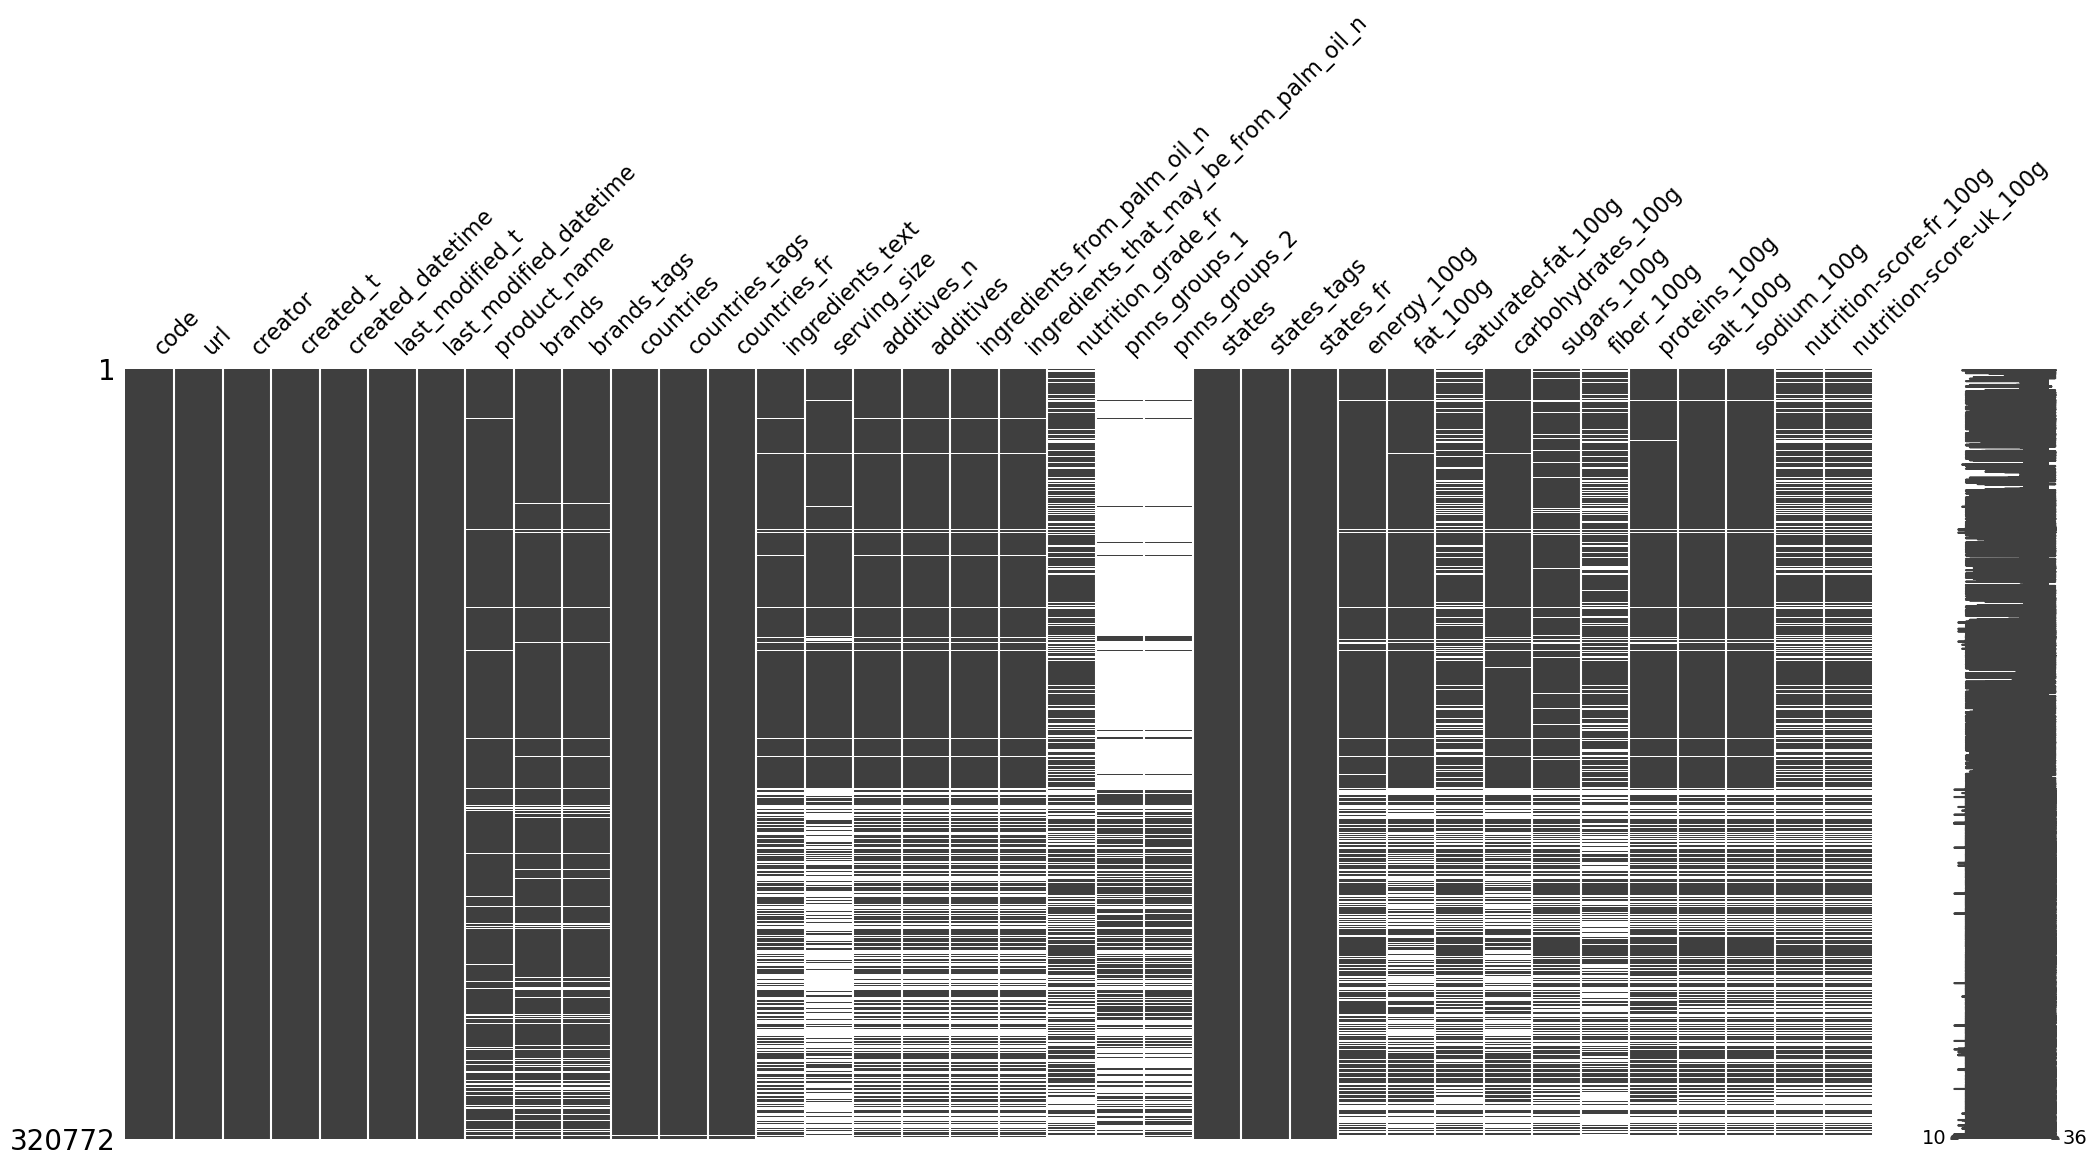

In [443]:
# Visualisation du remplissage avec missingo
msno.matrix(df_openfoodfacts)
plt.show()

- **Plusieurs colonnes apparaissent comme totalement rempli et d'autre colonne avec des parties vides dans la visualisation.**

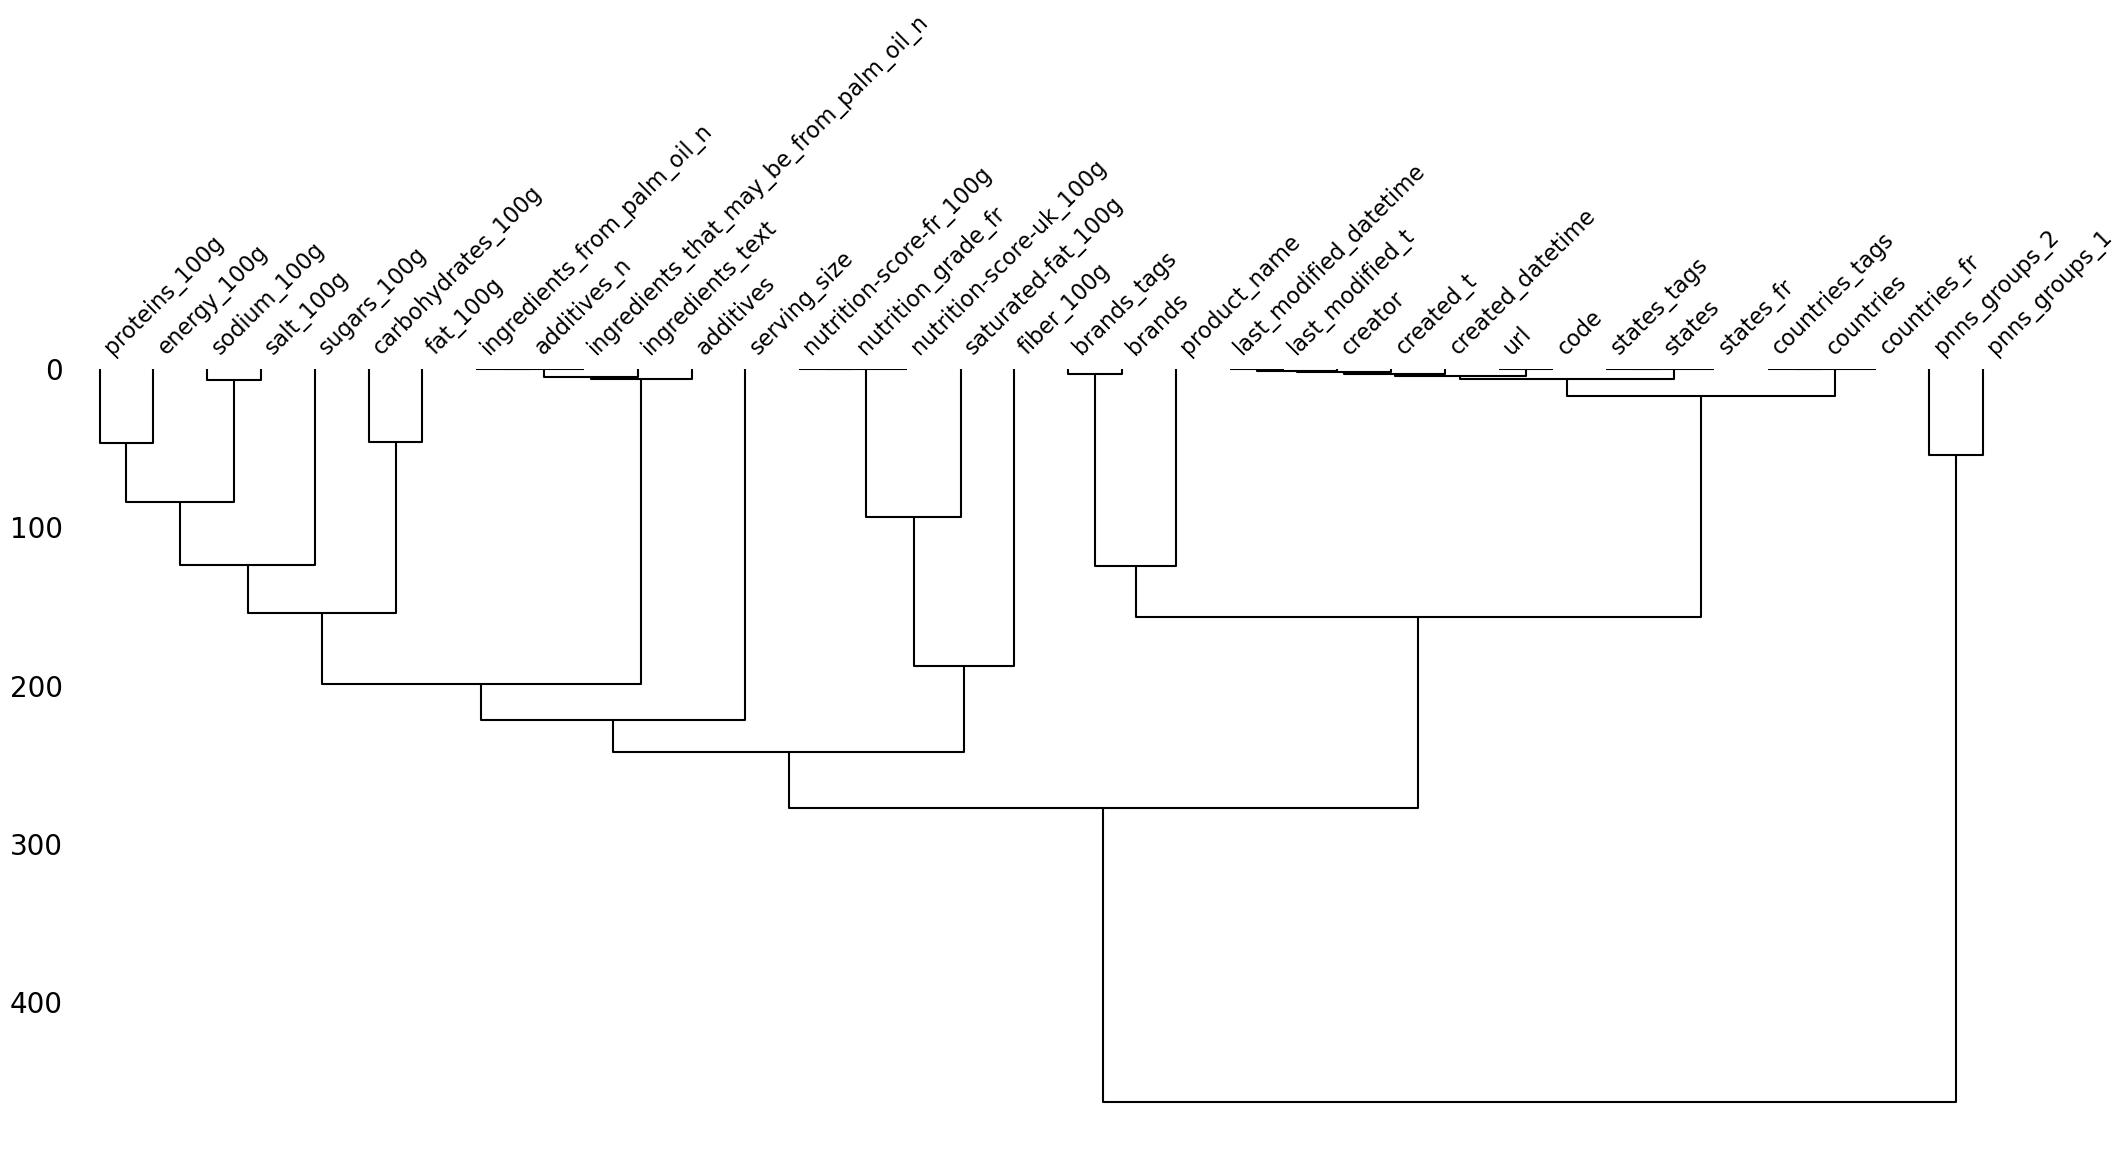

In [444]:
msno.dendrogram(df_openfoodfacts)
plt.show()

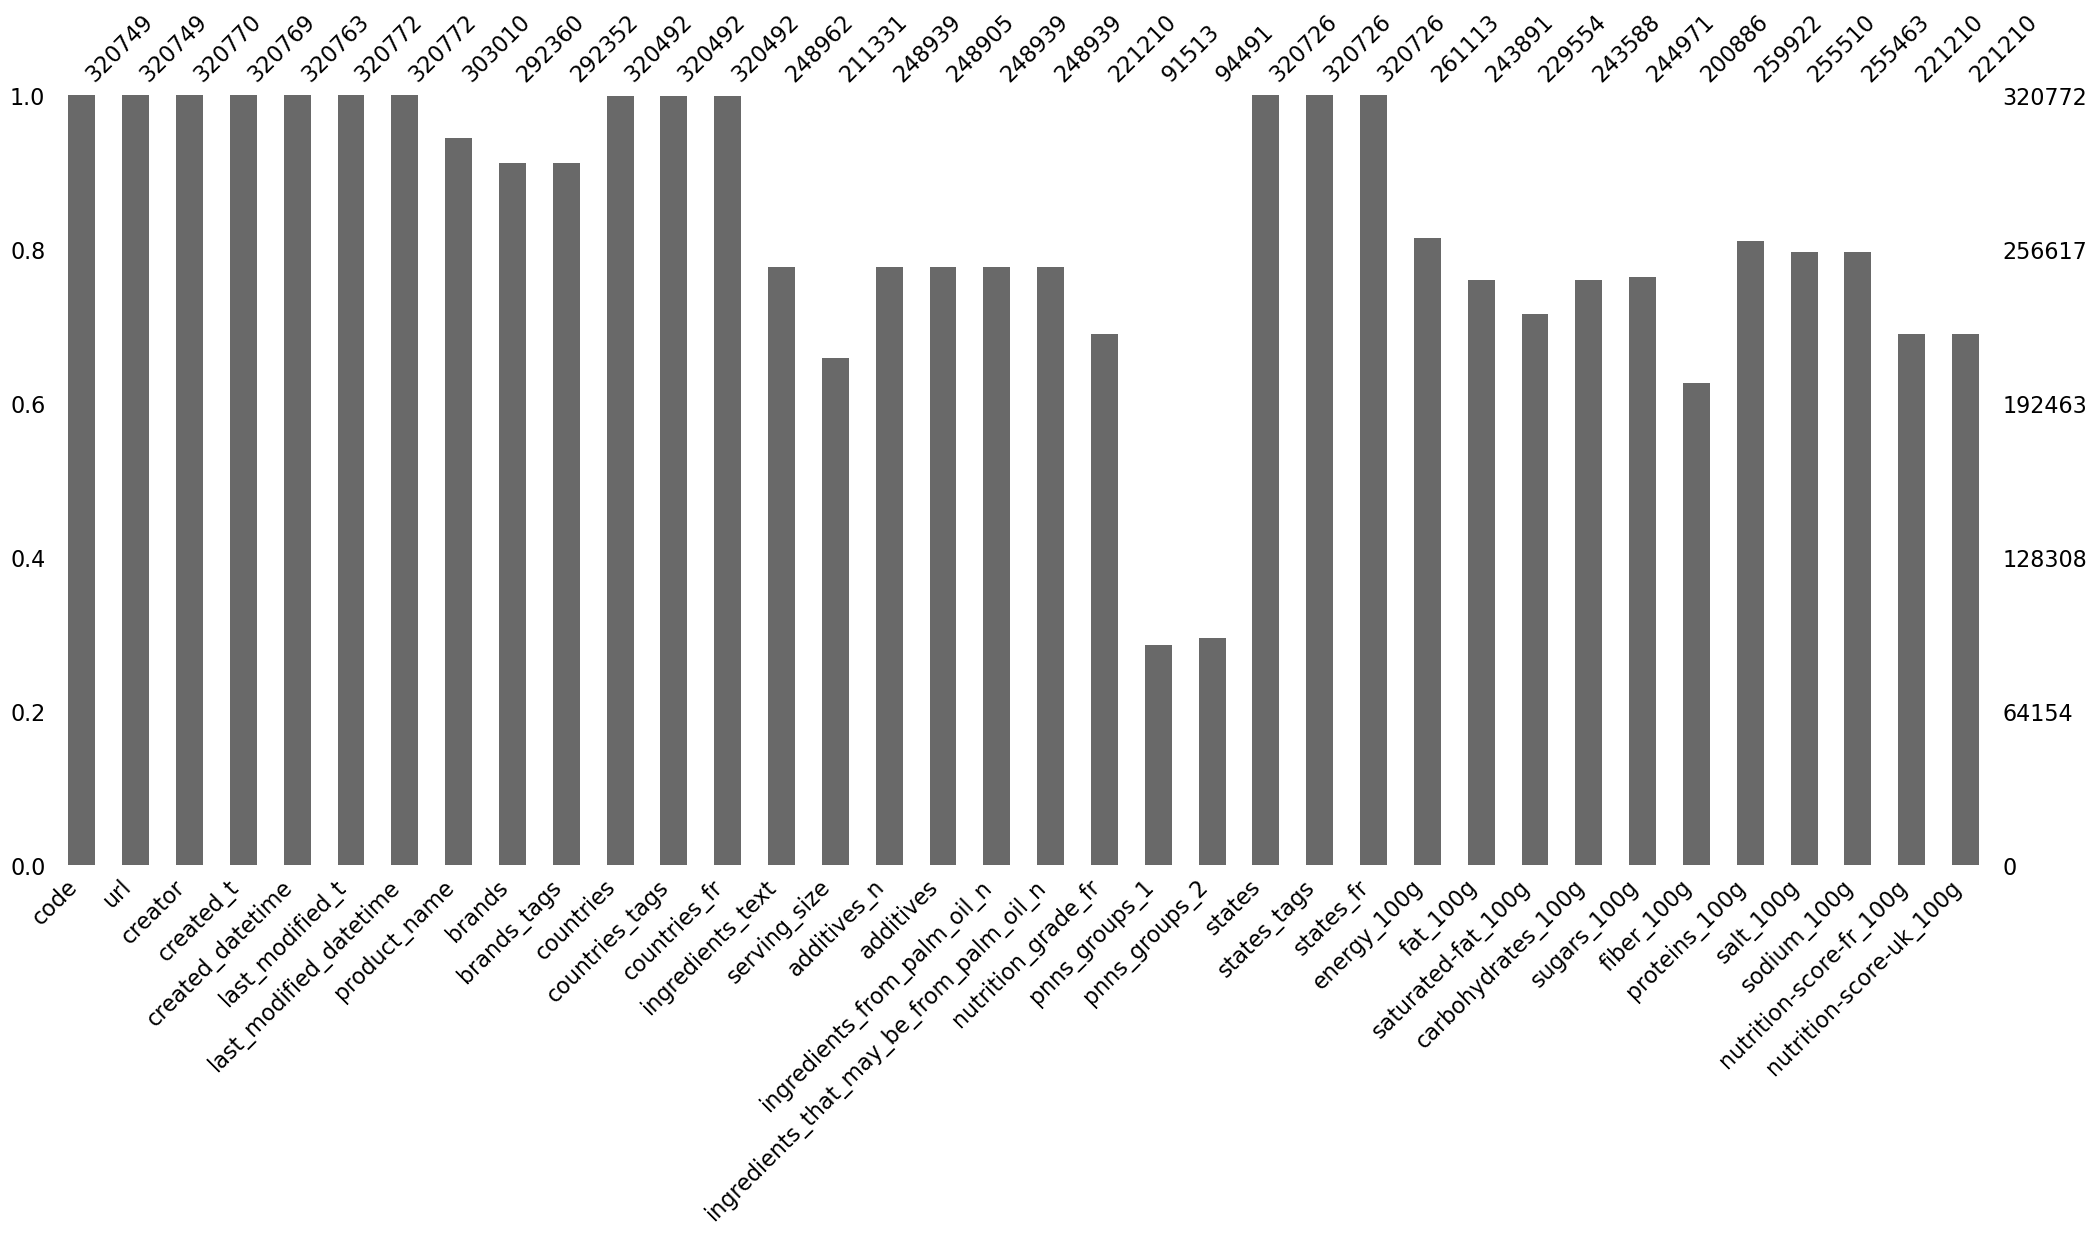

In [445]:
msno.bar(df_openfoodfacts)
plt.show()

### 1- Elimination des lignes et colonnes vides.

In [446]:
# Suppression des colonnes vides
df_openfoodfacts = df_openfoodfacts.dropna(axis=1, how='all')

In [447]:
# Suppression des lignes ne contenant pas d'informations sur les ingrédients :

nombre_colonnes_ingredients = Ingredients.shape[1]

# Création d'une série indiquant le nombre de valeurs nulles par ligne dans Ingredients
valeurs_nulles_par_ligne = Ingredients.isna().sum(axis=1).to_frame()

# Sélection des index des lignes où le nombre de valeurs nulles est égal au nombre total de colonnes (toutes les valeurs sont nulles)
index_lignes_vide = valeurs_nulles_par_ligne[valeurs_nulles_par_ligne[0] == nombre_colonnes_ingredients].index

# Suppression des lignes correspondant aux index des produits vides dans df_openfoodfacts
   # Reset de l'index pour avoir une indexation continue après la suppression
df_openfoodfacts = df_openfoodfacts.drop(index_lignes_vide, axis=0).reset_index(drop=True)

In [448]:
df_openfoodfacts.shape

(262768, 36)

- **Il reste ainsi un total de 34 colonnes et 262768 lignes dans ce DataFrame.**

In [449]:
# Processus de néttoyage
# Création d'une liste contenant les informations de l'étape 3
etape3 = ['Etape 3', "Suppression des lignes ne contenant pas d'informations sur les ingrédients", df_openfoodfacts.shape[1], 
          df_openfoodfacts.shape[0], # Nombre total de colonnes avant la suppression
          round((df_openfoodfacts.isna().sum().sum())*100/(df_openfoodfacts.shape[0]*df_openfoodfacts.shape[1]))]   # Calcul du pourcentage de NaN

# Conversion de la liste en DataFrame avec les bonnes colonnes
etape3 = pd.DataFrame([etape3], columns=['Etapes', 'Action', 'Nb_Colonne', 'Nb_Ligne', 'Pourcentage_NaN'])

# Ajout de l'étape au DataFrame df_processus_nettoyage
df_processus_nettoyage = df_processus_nettoyage.append(etape3, ignore_index=True)

# Afficher le DataFrame mis à jour
df_processus_nettoyage

,Etapes,Action,Nb_Colonne,Nb_Ligne,Pourcentage_NaN
0,Etape 1,Ouverture du Fichier,162,320772,76
1,Etape 2,"Suppression des colonnes ayant moins de 50% de leur valeur rempli, sauf 'pnns_groups_1', 'pnns_groups_2'",36,320772,17
2,Etape 3,Suppression des lignes ne contenant pas d'informations sur les ingrédients,36,262768,9


## III- Examen des colonnes restantes et évaluation de leur pertinence pour l'application.

L'agence **Santé publique France** souhaite améliorer sa base de données Open Food Facts et fait appel aux services de votre entreprise. Cette base de données open source est mise à la disposition de particuliers et d’organisations afin de leur permettre de connaître la qualité nutritionnelle de produits. 

Le site internet fournit une explication des variables à l'adresse suivante : https://world.openfoodfacts.org/data/data-fields.txt.

Après une analyse préliminaire des variables, il apparaît que plusieurs d'entre elles sont liées à l'environnement. Il serait pertinent de déterminer si nos habitudes alimentaires ont un impact significatif sur l'environnement. En effet, bien manger est important, mais contribuer à la protection de la nature et à la santé de nos concitoyens est encore plus crucial.

## Analyse du contenu des différentes variables par catégorie (Etape).
Vous pouvez consulter le lien suivant pour accéder aux détails des variables :https://world.openfoodfacts.org/data/data-fields.txt


Nous procédons à une suppression progressive des **colonnes** non pertinentes, car conserver **les 162 colonnes** actuelles serait excessif pour l'application et l'analyse.
De même, nous éliminons **les lignes** contenant un nombre significatif d'informations manquantes, car ces données pourraient être inutiles pour l'application et l'analyse.

Ce fichier décrit les champs issus de l'export CSV des produits dans la base de données Open Food Facts.

Voir https://world.openfoodfacts.org/data pour plus d'informations.

Le codage du fichier est Unicode UTF-8. Le caractère qui sépare les champs est <tab> (tabulation).

Généralités :

- les champs qui se terminent par _t sont des dates au format d'horodatage UNIX (nombre de secondes depuis le 1er janvier 1970)
- les champs qui se terminent par _datetime sont des dates au format iso8601 : aaaa-mm-jjThh:mn:ssZ
- les champs qui se terminent par _tags sont une liste de balises séparées par des virgules (par exemple,category_tags est l'ensemble des balises normalisées par ordinateur du champ catégories)
- les champs qui se terminent par un code de langue à 2 lettres (par exemple fr pour le français) sont l'ensemble des balises dans cette langue
- les champs qui se terminent par _100g correspondent à la quantité d'un nutriment (en g, ou kJ pour l'énergie) pour 100 g ou 100 ml de produit
- les champs qui se terminent par _serving correspondent à la quantité d'un nutriment (en g, ou kJ pour l'énergie) pour 1 portion du produit

### 1- Catégorie Informations générales 

In [450]:
df_openfoodfacts.head(3)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,brands,brands_tags,countries,countries_tags,countries_fr,ingredients_text,serving_size,additives_n,additives,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,4530,http://world-fr.openfoodfacts.org/produit/0000000004530/banana-chips-sweetened-whole,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,US,en:united-states,États-Unis,"Bananas, vegetable oil (coconut oil, corn oil and/or palm oil) sugar, natural banana flavor.",28 g (1 ONZ),0.0,[ bananas -> en:bananas ] [ vegetable-oil -> en:vegetable-oil ] [ oil -> en:oil ] [ coconut-oil -> en:coconut-oil ] [ oil -> en:oil ] [ corn-oil-and-or-palm-oil-sugar -> en:corn-oil-and-or-palm-oil-sugar ] [ oil-and-or-palm-oil-sugar -> en:oil-and-or-palm-oil-sugar ] [ and-or-palm-oil-sugar -> en:and-or-palm-oil-sugar ] [ or-palm-oil-sugar -> en:or-palm-oil-sugar ] [ palm-oil-sugar -> en:palm-oil-sugar ] [ oil-sugar -> en:oil-sugar ] [ sugar -> en:sugar ] [ natural-banana-flavor -> en:natural-banana-flavor ] [ banana-flavor -> en:banana-flavor ] [ flavor -> en:flavor ],0.0,0.0,d,NaN,NaN,"en:to-be-completed, en:nutrition-facts-completed, en:ingredients-completed, en:expiration-date-to-be-completed, en:packaging-code-to-be-completed, en:characteristics-to-be-completed, en:categories-to-be-completed, en:brands-to-be-completed, en:packaging-to-be-completed, en:quantity-to-be-completed, en:product-name-completed, en:photos-to-be-uploaded","en:to-be-completed,en:nutrition-facts-completed,en:ingredients-completed,en:expiration-date-to-be-completed,en:packaging-code-to-be-completed,en:characteristics-to-be-completed,en:categories-to-be-completed,en:brands-to-be-completed,en:packaging-to-be-completed,en:quantity-to-be-completed,en:product-name-completed,en:photos-to-be-uploaded","A compléter,Informations nutritionnelles complétées,Ingrédients complétés,Date limite à compléter,en:Packaging-code-to-be-completed,Caractéristiques à compléter,Catégories à compléter,Marques à compléter,Emballage à compléter,Quantité à compléter,Nom du produit complete,Photos à envoyer",2243.0,28.57,28.57,64.29,14.29,3.6,3.57,0.00000,0.000,14.0,14.0
1,4559,http://world-fr.openfoodfacts.org/produit/0000000004559/peanuts-torn-glasser,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,Torn & Glasser,torn-glasser,US,en:united-states,États-Unis,"Peanuts, wheat flour, sugar, rice flour, tapioca starch, salt, leavening (ammonium bicarbonate, baking soda), soy sauce (water, soybeans, wheat, salt), potato starch.",28 g (0.25 cup),0.0,[ peanuts -> en:peanuts ] [ wheat-flour -> en:wheat-flour ] [ flour -> en:flour ] [ sugar -> en:sugar ] [ rice-flour -> en:rice-flour ] [ flour -> en:flour ] [ tapioca-starch -> en:tapioca-starch ] [ starch -> en:starch ] [ salt -> en:salt ] [ leavening -> en:leavening ] [ ammonium-bicarbonate -> en:ammonium-bicarbonate ] [ bicarbonate -> en:bicarbonate ] [ baking-soda -> en:baking-soda ] [ soda -> en:soda ] [ soy-sauce -> en:soy-sauce ] [ sauce -> en:sauce ] [ water -> en:water ] [ soybeans -> en:soybeans ] [ wheat -> en:wheat ] [ salt -> en:salt ] [ potato-starch -> en:potato-starch ] [ starch -> en:starch ],0.0,0.0,b,NaN,NaN,"en:to-be-completed, en:nutrition-facts-completed, en:ingredients-completed, en:expiration-date-to-be-completed, en:packaging-code-to-be-completed, en:characteristics-to-be-completed, en:categories-to-be-completed, en:brands-completed, en:packaging-to-be-completed, en:quantity-to-be-completed, en:product-name-completed, en:photos-to-be-uploaded","en:to-be-completed,en:nutrition-facts-completed,en:ingredients-completed,en:expi

In [451]:
# Les 10 premières colonnes représentent les variables de cette catégorie :
df_Variable_info_generale = df_openfoodfacts.iloc[:, :8]
df_Variable_info_generale.head(3)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name
0,4530,http://world-fr.openfoodfacts.org/produit/0000000004530/banana-chips-sweetened-whole,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole)
1,4559,http://world-fr.openfoodfacts.org/produit/0000000004559/peanuts-torn-glasser,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts
2,16087,http://world-fr.openfoodfacts.org/produit/0000000016087/organic-salted-nut-mix-grizzlies,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix


In [452]:
# .info() pour observer les differentes caractéristiques de nos variables

df_Variable_info_generale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262768 entries, 0 to 262767
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   code                    262752 non-null  object
 1   url                     262752 non-null  object
 2   creator                 262768 non-null  object
 3   created_t               262765 non-null  object
 4   created_datetime        262761 non-null  object
 5   last_modified_t         262768 non-null  object
 6   last_modified_datetime  262768 non-null  object
 7   product_name            259396 non-null  object
dtypes: object(8)
memory usage: 16.0+ MB


In [453]:
# Analyse des produits sans code et sans URL :
produits_sans_code_url = df_Variable_info_generale[(df_Variable_info_generale['code'].isna()) & (df_Variable_info_generale['url'].isna())]
nombre_produits_sans_code_url = len(produits_sans_code_url)
createurs_produits_sans_code_url = produits_sans_code_url['creator'].unique()

# Affichage du nombre de produits sans code ni URL
print(nombre_produits_sans_code_url)

# Affichage des créateurs des produits sans code ni URL
print(createurs_produits_sans_code_url)

# Suppression des lignes avec des valeurs nulles dans la colonne 'code'
df_openfoodfacts = df_openfoodfacts.dropna(subset=['code'])

16
['villecomtal-sur-arros-gers-france,saint-just-chaleyssin-isere-france'
 'villecomtal-sur-arros-gers-france']


- **Nous avons identifié 16 produits sans code ni URL.**
- **Ces 16 produits ont tous été créés par le même contributeur dans ce DataFrame.**
- **Bien que ces 16 produits présentent un manque d'information, la présence des colonnes 'code' et 'url' est utile pour accéder à la fiche produit sur le site internet.**
- **Par conséquent, nous avons décidé d'éliminer ces 16 lignes, car l'absence d'URL ne facilite pas la recherche d'informations sur les produits pour le client.**

In [454]:
# Produits en double :
produits_en_double = df_openfoodfacts["code"].value_counts()
print(produits_en_double)

74880070033     2
26700129155     2
21500011907     2
21500042161     2
9542013028      2
               ..
75450525021     1
75450525038     1
75450525045     1
75450525052     1
999990026839    1
Name: code, Length: 262664, dtype: int64


- **Il semble y avoir des produits en double dans les données. Nous devrons vérifier après le nettoyage si cette situation persiste.**

In [455]:
# Analyse des colonnes Creations:
colonnes_creations = ['creator', 'created_t', 'created_datetime', 'last_modified_t', 'last_modified_datetime']
for colonne in colonnes_creations:
    print(df_Variable_info_generale[colonne].nunique())

# Suppression des colonnes de données de création et de modification
df_openfoodfacts = df_openfoodfacts.drop(columns=colonnes_creations)

2529
132921
132884
126212
126120


- **Nous avons identifié 2529 créateurs différents dans ce jeu de données.**
- **Il y a 132921 dates de création de lignes dans ce jeu de données au format UNIX timestamp.**
- **Il y a également 132884 dates de création de lignes dans ce jeu de données au format iso8601 (yyyy-mm-ddThh:mn:ssZ).**
- **Nous avons remarqué quelques lignes où les deux formats de dates ne correspondent pas.**
- **Des observations similaires ont été faites pour les colonnes de modifications qui présentent les mêmes différences entre les deux formats.**
- **Étant donné que ces 3 colonnes ne sont pas pertinentes pour l'analyse des produits ni pour la création d'une application, nous avons décidé de les suprimer.**

In [456]:
# Analyse de la  colonnes produits :
nb_product_name_nans = len(df_Variable_info_generale[df_Variable_info_generale['product_name'].isna()])

print(nb_product_name_nans)

# Suppression des lignes sans 'product_name'
df_openfoodfacts = df_openfoodfacts.dropna(subset=['product_name'])

3372


- **Nous avons identifié 3372 produits sans nom spécifique.**
- **Enfin, les lignes sans nom de produit ne sont pas pertinentes pour notre analyse et ont été supprimées.**

### À retenir : 

- **pour la section des informations générales, les colonnes les plus importantes sont : 'code', 'url', et 'product_name'.**

In [457]:
# Processus de néttoyage
# Création d'une liste contenant les informations de l'étape 4
etape4 = ['Etape 4', 'Analyse des variables pour les informations générales', df_openfoodfacts.shape[1], 
          df_openfoodfacts.shape[0], # Nombre total de colonnes avant la suppression
          round((df_openfoodfacts.isna().sum().sum())*100/(df_openfoodfacts.shape[0]*df_openfoodfacts.shape[1]))]   # Calcul du pourcentage de NaN

# Conversion de la liste en DataFrame avec les bonnes colonnes
etape4 = pd.DataFrame([etape4], columns=['Etapes', 'Action', 'Nb_Colonne', 'Nb_Ligne', 'Pourcentage_NaN'])

# Ajout de l'étape au DataFrame df_processus_nettoyage
df_processus_nettoyage = df_processus_nettoyage.append(etape4, ignore_index=True)

# Afficher le DataFrame mis à jour
df_processus_nettoyage

,Etapes,Action,Nb_Colonne,Nb_Ligne,Pourcentage_NaN
0,Etape 1,Ouverture du Fichier,162,320772,76
1,Etape 2,"Suppression des colonnes ayant moins de 50% de leur valeur rempli, sauf 'pnns_groups_1', 'pnns_groups_2'",36,320772,17
2,Etape 3,Suppression des lignes ne contenant pas d'informations sur les ingrédients,36,262768,9
3,Etape 4,Analyse des variables pour les informations générales,31,259380,11


### 2- Les catégories Tags 

In [458]:
# Toujour notre DataFrame principale

df_openfoodfacts.head(3)

,code,url,product_name,brands,brands_tags,countries,countries_tags,countries_fr,ingredients_text,serving_size,additives_n,additives,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,4530,http://world-fr.openfoodfacts.org/produit/0000000004530/banana-chips-sweetened-whole,Banana Chips Sweetened (Whole),NaN,NaN,US,en:united-states,États-Unis,"Bananas, vegetable oil (coconut oil, corn oil and/or palm oil) sugar, natural banana flavor.",28 g (1 ONZ),0.0,[ bananas -> en:bananas ] [ vegetable-oil -> en:vegetable-oil ] [ oil -> en:oil ] [ coconut-oil -> en:coconut-oil ] [ oil -> en:oil ] [ corn-oil-and-or-palm-oil-sugar -> en:corn-oil-and-or-palm-oil-sugar ] [ oil-and-or-palm-oil-sugar -> en:oil-and-or-palm-oil-sugar ] [ and-or-palm-oil-sugar -> en:and-or-palm-oil-sugar ] [ or-palm-oil-sugar -> en:or-palm-oil-sugar ] [ palm-oil-sugar -> en:palm-oil-sugar ] [ oil-sugar -> en:oil-sugar ] [ sugar -> en:sugar ] [ natural-banana-flavor -> en:natural-banana-flavor ] [ banana-flavor -> en:banana-flavor ] [ flavor -> en:flavor ],0.0,0.0,d,NaN,NaN,"en:to-be-completed, en:nutrition-facts-completed, en:ingredients-completed, en:expiration-date-to-be-completed, en:packaging-code-to-be-completed, en:characteristics-to-be-completed, en:categories-to-be-completed, en:brands-to-be-completed, en:packaging-to-be-completed, en:quantity-to-be-completed, en:product-name-completed, en:photos-to-be-uploaded","en:to-be-completed,en:nutrition-facts-completed,en:ingredients-completed,en:expiration-date-to-be-completed,en:packaging-code-to-be-completed,en:characteristics-to-be-completed,en:categories-to-be-completed,en:brands-to-be-completed,en:packaging-to-be-completed,en:quantity-to-be-completed,en:product-name-completed,en:photos-to-be-uploaded","A compléter,Informations nutritionnelles complétées,Ingrédients complétés,Date limite à compléter,en:Packaging-code-to-be-completed,Caractéristiques à compléter,Catégories à compléter,Marques à compléter,Emballage à compléter,Quantité à compléter,Nom du produit complete,Photos à envoyer",2243.0,28.57,28.57,64.29,14.29,3.6,3.57,0.00000,0.000,14.0,14.0
1,4559,http://world-fr.openfoodfacts.org/produit/0000000004559/peanuts-torn-glasser,Peanuts,Torn & Glasser,torn-glasser,US,en:united-states,États-Unis,"Peanuts, wheat flour, sugar, rice flour, tapioca starch, salt, leavening (ammonium bicarbonate, baking soda), soy sauce (water, soybeans, wheat, salt), potato starch.",28 g (0.25 cup),0.0,[ peanuts -> en:peanuts ] [ wheat-flour -> en:wheat-flour ] [ flour -> en:flour ] [ sugar -> en:sugar ] [ rice-flour -> en:rice-flour ] [ flour -> en:flour ] [ tapioca-starch -> en:tapioca-starch ] [ starch -> en:starch ] [ salt -> en:salt ] [ leavening -> en:leavening ] [ ammonium-bicarbonate -> en:ammonium-bicarbonate ] [ bicarbonate -> en:bicarbonate ] [ baking-soda -> en:baking-soda ] [ soda -> en:soda ] [ soy-sauce -> en:soy-sauce ] [ sauce -> en:sauce ] [ water -> en:water ] [ soybeans -> en:soybeans ] [ wheat -> en:wheat ] [ salt -> en:salt ] [ potato-starch -> en:potato-starch ] [ starch -> en:starch ],0.0,0.0,b,NaN,NaN,"en:to-be-completed, en:nutrition-facts-completed, en:ingredients-completed, en:expiration-date-to-be-completed, en:packaging-code-to-be-completed, en:characteristics-to-be-completed, en:categories-to-be-completed, en:brands-completed, en:packaging-to-be-completed, en:quantity-to-be-completed, en:product-name-completed, en:photos-to-be-uploaded","en:to-be-completed,en:nutrition-facts-completed,en:ingredients-completed,en:expiration-date-to-be-completed,en:packaging-code-to-be-completed,en:characteristics-to-be-completed,en:categories-to-be-completed,en:brands-completed,en:packaging-to-be-completed,en:quantity-to-be-completed,en:product-name-completed,en:p

In [459]:
# Les 24 colonnes apres les variables info generale représentent les variables de cette catégorie "tags" :

df_Variable_tags = df_openfoodfacts.iloc[:,3:8]
df_Variable_tags.head()

,brands,brands_tags,countries,countries_tags,countries_fr
0,NaN,NaN,US,en:united-states,États-Unis
1,Torn & Glasser,torn-glasser,US,en:united-states,États-Unis
2,Grizzlies,grizzlies,US,en:united-states,États-Unis
3,Bob's Red Mill,bob-s-red-mill,US,en:united-states,États-Unis
4,Unfi,unfi,US,en:united-states,États-Unis


In [460]:
# .info() pour observer les differentes caractéristiques de nos variables

df_Variable_tags.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 259380 entries, 0 to 262767
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   brands          256015 non-null  object
 1   brands_tags     256014 non-null  object
 2   countries       259315 non-null  object
 3   countries_tags  259315 non-null  object
 4   countries_fr    259315 non-null  object
dtypes: object(5)
memory usage: 11.9+ MB


In [461]:
# Fonction pour afficher le nombre de valeurs uniques dans une colonne et le pourcentage de valeurs manquantes

def print_unique_and_null_stats(column):
    unique_values = df_Variable_tags[column].dropna().unique()
    unique_count = len(unique_values)
    null_percentage = df_Variable_tags[column].isna().sum() / len(df_Variable_tags) * 100
    print(f"Nombre de valeurs uniques dans '{column}': {unique_count}")
    print(f"Pourcentage de valeurs manquantes dans '{column}': {round(null_percentage)}%")

In [462]:
# brands (marques)

# Etude du brands:
print_unique_and_null_stats('brands')
print_unique_and_null_stats('brands_tags')

# Comptage des lignes où 'brands' est manquant et 'brands_tags' est présent
missing_brands_tags = df_Variable_tags[(df_Variable_tags['brands'].isna()) & (df_Variable_tags['brands_tags'].notna())]
print(f"\nNombre de lignes avec 'brands' manquant et 'brands_tags' présent: {len(missing_brands_tags)}")

# Liste des valeurs uniques de 'brands_tags' pour les lignes concernées
print("\nListe des valeurs uniques de 'brands_tags' pour les lignes concernées:")
print(list(missing_brands_tags['brands_tags'].unique()))

# Suppression de la colonne 'bands'
del df_openfoodfacts['brands']

Nombre de valeurs uniques dans 'brands': 46383
Pourcentage de valeurs manquantes dans 'brands': 1%
Nombre de valeurs uniques dans 'brands_tags': 40836
Pourcentage de valeurs manquantes dans 'brands_tags': 1%

Nombre de lignes avec 'brands' manquant et 'brands_tags' présent: 2

Liste des valeurs uniques de 'brands_tags' pour les lignes concernées:
['na']


- **Il y a 46383 marques répertoriées dans la colonne 'brands' par rapport à 40836 dans la colonne 'brands_tags' (données normalisées).**

- **Ces colonnes présentent 1% de valeurs manquantes (NaNs).**

- **Aucune information supplémentaire n'est fournie entre ces deux colonnes, à l'exception d'un remplissage manuel des cases vides avec le mot 'na'.**

- **Ces colonnes sont très pertinentes pour des études futures. La colonne avec les tags ('brands_tags') est la plus intéressante à conserver car elle est normalisée.**

In [463]:
colonnes_pays = ['countries', 'countries_tags', 'countries_fr']

# Calculer le pourcentage de valeurs manquantes pour chaque colonne
for col in colonnes_pays:
    pourcentage_manquant = round((df_Variable_tags[col].isna().sum()) / len(df_Variable_tags) * 100, 2)
    print("Pourcentage de valeurs manquantes pour", col + ":", pourcentage_manquant)


# Suppression des colonnes 'countries' et 'countries_tags' dans df_openfoodfacts
del df_openfoodfacts['countries']
del df_openfoodfacts['countries_tags']

Pourcentage de valeurs manquantes pour countries: 0.03
Pourcentage de valeurs manquantes pour countries_tags: 0.03
Pourcentage de valeurs manquantes pour countries_fr: 0.03


- **La colonne 'countries' contient une liste de pays, écrite en toutes lettres ou en abrégé, dans différentes langues.**
- **Les colonnes 'countries_tags' et 'countries_fr' sont également des listes de pays, écrites en toutes lettres dans différentes langues.**
- **Toutes ces colonnes sont remplies de manière similaire et sont quasiment entièrement complètes.**
- **Les informations de la colonne 'countries_fr' sont particulièrement intéressantes, car normalisé.**

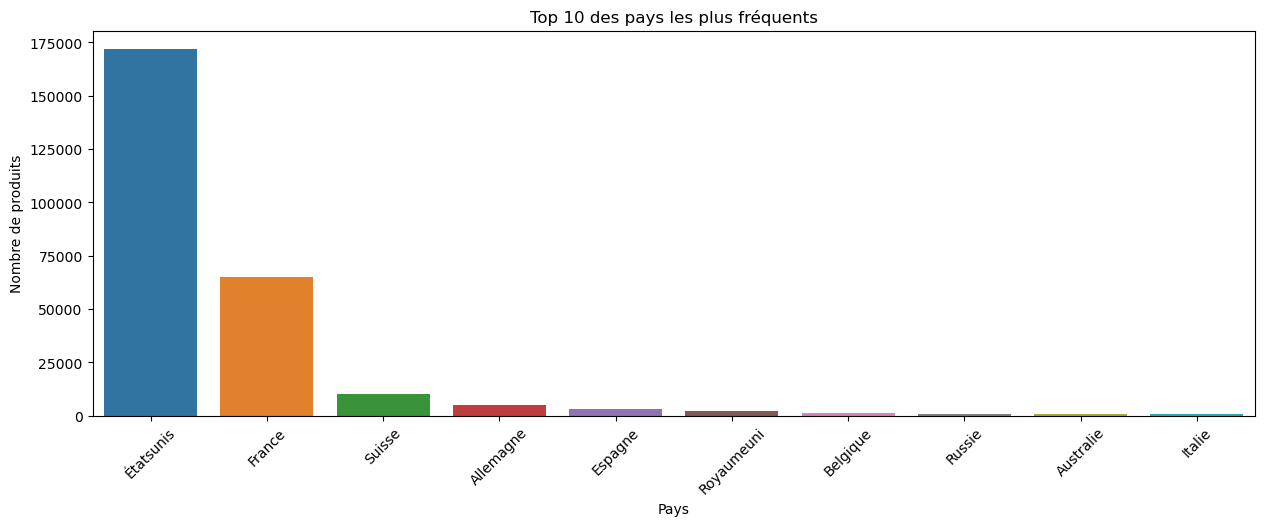

In [464]:
# Récupération de la liste des pays depuis la colonne 'countries_fr'
liste_pays_bruts = [str(pays).replace(',', '').replace(' ','').replace('-', '').replace('Uni','uni') for pays in df_openfoodfacts['countries_fr']]

# Utilisation de regex pour extraire les mots commençant par une majuscule
liste_pays_majuscules = [mot for pays in liste_pays_bruts for mot in re.findall('[A-ZÉÈ][^A-ZÉÈ]*', pays)]

# Création du DataFrame pour les fréquences des pays
df_pays_frequents = pd.DataFrame(liste_pays_majuscules, columns=['Pays']).value_counts().head(10).reset_index()

# Affichage du graphique en barres
plt.figure(figsize=(15, 5))
sns.barplot(x='Pays', y=0, data=df_pays_frequents)
plt.xticks(rotation=45)
plt.xlabel('Pays')
plt.ylabel('Nombre de produits')
plt.title('Top 10 des pays les plus fréquents')
plt.show()

- **Il y a significativement plus de produits vendus aux États-Unis qu'en France.**
- **Nous pouvons supposer que les normes régissant ces produits ne sont pas les mêmes.**
- **Dans le cadre de l'application, il est préférable de se concentrer sur les produits vendus partout dans le monde.**

**Récupération de la liste des pays depuis la colonne 'countries_fr' :**
liste_pays_bruts = [str(pays).replace(',', '').replace(' ', '').replace('-', '').replace('Uni', 'uni') for pays in Data['countries_fr']]: Cette ligne crée une liste liste_pays_bruts en parcourant chaque élément pays de la colonne 'countries_fr' du DataFrame Data. Pour chaque pays, les caractères spéciaux (virgule, espace, tiret) sont supprimés et la chaîne 'Uni' est remplacée par 'uni'. Cette liste contient donc les noms des pays après un traitement de nettoyage initial.


**Utilisation de regex pour extraire les mots commençant par une majuscule :**
liste_pays_majuscules = [mot for pays in liste_pays_bruts for mot in re.findall('[A-ZÉÈ][^A-ZÉÈ]*', pays)]: Cette ligne utilise une compréhension de liste pour parcourir chaque pays dans liste_pays_bruts. Pour chaque pays, re.findall('[A-ZÉÈ][^A-ZÉÈ]*', pays) trouve tous les mots commençant par une majuscule (ou 'É' ou 'È' accentués) et les ajoute à liste_pays_majuscules. Cela permet de récupérer les noms des pays avec une première lettre en majuscule, indépendamment de la présence de caractères spéciaux.


**Création du DataFrame pour les fréquences des pays :**
df_pays_frequents = pd.DataFrame(liste_pays_majuscules, columns=['Pays']).value_counts().head(10).reset_index(): Cette ligne crée un DataFrame df_pays_frequents à partir de liste_pays_majuscules. value_counts() compte le nombre d'occurrences de chaque pays, head(10) sélectionne les 10 premiers pays les plus fréquents, et reset_index() réinitialise l'index du DataFrame pour obtenir une structure de données adaptée à seaborn.

In [465]:
# Filtrer les données pour France et USA
france_data = df_openfoodfacts[
    (df_openfoodfacts['countries_fr'].notna()) &
    (df_openfoodfacts['countries_fr'].str.contains('France|france'))]

usa_data = df_openfoodfacts[
    (df_openfoodfacts['countries_fr'].notna()) &
    (df_openfoodfacts['countries_fr'].str.contains('États-Unis'))]

# Calculer les pourcentages de valeurs manquantes
france_missing = round(france_data.iloc[:, 39:].isna().sum(axis=0) / len(france_data) * 100).to_frame().rename(columns={0: 'France'})
usa_missing = round(usa_data.iloc[:, 39:].isna().sum(axis=0) / len(usa_data) * 100).to_frame().rename(columns={0: 'USA'})

# Fusionner les résultats
missing_values_by_country = pd.merge(france_missing, usa_missing, left_index=True, right_index=True)

# Afficher les résultats
print("Nombre de colonnes avec 100% de valeurs manquantes pour France et USA :")
print(len(missing_values_by_country[(missing_values_by_country["France"] == 100) & (missing_values_by_country['USA'] == 100)]))
print("\nNombre de colonnes avec 100% de valeurs manquantes pour France mais pas pour USA :")
print(len(missing_values_by_country[(missing_values_by_country["France"] == 100) & (missing_values_by_country['USA'] != 100)]))
print("\nNombre de colonnes avec 100% de valeurs manquantes pour USA mais pas pour France :")
print(len(missing_values_by_country[(missing_values_by_country["France"] != 100) & (missing_values_by_country['USA'] == 100)]))
print("\nColonnes avec 100% de valeurs manquantes pour France mais pas pour USA :")
print(missing_values_by_country[(missing_values_by_country["France"] == 100) & (missing_values_by_country['USA'] != 100)])
print("\nColonnes avec 100% de valeurs manquantes pour USA mais pas pour France :")
print(missing_values_by_country[(missing_values_by_country["France"] != 100) & (missing_values_by_country['USA'] == 100)])

Nombre de colonnes avec 100% de valeurs manquantes pour France et USA :
0

Nombre de colonnes avec 100% de valeurs manquantes pour France mais pas pour USA :
0

Nombre de colonnes avec 100% de valeurs manquantes pour USA mais pas pour France :
0

Colonnes avec 100% de valeurs manquantes pour France mais pas pour USA :
Empty DataFrame
Columns: [France, USA]
Index: []

Colonnes avec 100% de valeurs manquantes pour USA mais pas pour France :
Empty DataFrame
Columns: [France, USA]
Index: []


- **Il n'existe pas de colonnes avec très peu ou pas de données pour les deux principaux pays.**
- **Il n'y a pas de prédominance de colonnes spécifiquement pour les États-Unis ou la France.**

### À retenir :

Pour cette catégorie de variables, il est nécessaire de conserver les colonnes contenant "fr". car ces colonnes sont normalisées ou celles contenant des balises (tags) si aucune ne contient "fr".

In [466]:
# Processus de néttoyage
# Création d'une liste contenant les informations de l'étape 5
etape5 = ['Etape 5', 'Analyse des variables tags', df_openfoodfacts.shape[1], 
          df_openfoodfacts.shape[0], # Nombre total de colonnes avant la suppression
          round((df_openfoodfacts.isna().sum().sum())*100/(df_openfoodfacts.shape[0]*df_openfoodfacts.shape[1]))]   # Calcul du pourcentage de NaN

# Conversion de la liste en DataFrame avec les bonnes colonnes
etape5 = pd.DataFrame([etape5], columns=['Etapes', 'Action', 'Nb_Colonne', 'Nb_Ligne', 'Pourcentage_NaN'])

# Ajout de l'étape au DataFrame df_processus_nettoyage
df_processus_nettoyage = df_processus_nettoyage.append(etape5, ignore_index=True)

# Afficher le DataFrame mis à jour
df_processus_nettoyage

,Etapes,Action,Nb_Colonne,Nb_Ligne,Pourcentage_NaN
0,Etape 1,Ouverture du Fichier,162,320772,76
1,Etape 2,"Suppression des colonnes ayant moins de 50% de leur valeur rempli, sauf 'pnns_groups_1', 'pnns_groups_2'",36,320772,17
2,Etape 3,Suppression des lignes ne contenant pas d'informations sur les ingrédients,36,262768,9
3,Etape 4,Analyse des variables pour les informations générales,31,259380,11
4,Etape 5,Analyse des variables tags,28,259380,12


### 3- Les catégories ingredients

In [467]:
df_openfoodfacts.head(3)

,code,url,product_name,brands_tags,countries_fr,ingredients_text,serving_size,additives_n,additives,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,4530,http://world-fr.openfoodfacts.org/produit/0000000004530/banana-chips-sweetened-whole,Banana Chips Sweetened (Whole),NaN,États-Unis,"Bananas, vegetable oil (coconut oil, corn oil and/or palm oil) sugar, natural banana flavor.",28 g (1 ONZ),0.0,[ bananas -> en:bananas ] [ vegetable-oil -> en:vegetable-oil ] [ oil -> en:oil ] [ coconut-oil -> en:coconut-oil ] [ oil -> en:oil ] [ corn-oil-and-or-palm-oil-sugar -> en:corn-oil-and-or-palm-oil-sugar ] [ oil-and-or-palm-oil-sugar -> en:oil-and-or-palm-oil-sugar ] [ and-or-palm-oil-sugar -> en:and-or-palm-oil-sugar ] [ or-palm-oil-sugar -> en:or-palm-oil-sugar ] [ palm-oil-sugar -> en:palm-oil-sugar ] [ oil-sugar -> en:oil-sugar ] [ sugar -> en:sugar ] [ natural-banana-flavor -> en:natural-banana-flavor ] [ banana-flavor -> en:banana-flavor ] [ flavor -> en:flavor ],0.0,0.0,d,NaN,NaN,"en:to-be-completed, en:nutrition-facts-completed, en:ingredients-completed, en:expiration-date-to-be-completed, en:packaging-code-to-be-completed, en:characteristics-to-be-completed, en:categories-to-be-completed, en:brands-to-be-completed, en:packaging-to-be-completed, en:quantity-to-be-completed, en:product-name-completed, en:photos-to-be-uploaded","en:to-be-completed,en:nutrition-facts-completed,en:ingredients-completed,en:expiration-date-to-be-completed,en:packaging-code-to-be-completed,en:characteristics-to-be-completed,en:categories-to-be-completed,en:brands-to-be-completed,en:packaging-to-be-completed,en:quantity-to-be-completed,en:product-name-completed,en:photos-to-be-uploaded","A compléter,Informations nutritionnelles complétées,Ingrédients complétés,Date limite à compléter,en:Packaging-code-to-be-completed,Caractéristiques à compléter,Catégories à compléter,Marques à compléter,Emballage à compléter,Quantité à compléter,Nom du produit complete,Photos à envoyer",2243.0,28.57,28.57,64.29,14.29,3.6,3.57,0.00000,0.000,14.0,14.0
1,4559,http://world-fr.openfoodfacts.org/produit/0000000004559/peanuts-torn-glasser,Peanuts,torn-glasser,États-Unis,"Peanuts, wheat flour, sugar, rice flour, tapioca starch, salt, leavening (ammonium bicarbonate, baking soda), soy sauce (water, soybeans, wheat, salt), potato starch.",28 g (0.25 cup),0.0,[ peanuts -> en:peanuts ] [ wheat-flour -> en:wheat-flour ] [ flour -> en:flour ] [ sugar -> en:sugar ] [ rice-flour -> en:rice-flour ] [ flour -> en:flour ] [ tapioca-starch -> en:tapioca-starch ] [ starch -> en:starch ] [ salt -> en:salt ] [ leavening -> en:leavening ] [ ammonium-bicarbonate -> en:ammonium-bicarbonate ] [ bicarbonate -> en:bicarbonate ] [ baking-soda -> en:baking-soda ] [ soda -> en:soda ] [ soy-sauce -> en:soy-sauce ] [ sauce -> en:sauce ] [ water -> en:water ] [ soybeans -> en:soybeans ] [ wheat -> en:wheat ] [ salt -> en:salt ] [ potato-starch -> en:potato-starch ] [ starch -> en:starch ],0.0,0.0,b,NaN,NaN,"en:to-be-completed, en:nutrition-facts-completed, en:ingredients-completed, en:expiration-date-to-be-completed, en:packaging-code-to-be-completed, en:characteristics-to-be-completed, en:categories-to-be-completed, en:brands-completed, en:packaging-to-be-completed, en:quantity-to-be-completed, en:product-name-completed, en:photos-to-be-uploaded","en:to-be-completed,en:nutrition-facts-completed,en:ingredients-completed,en:expiration-date-to-be-completed,en:packaging-code-to-be-completed,en:characteristics-to-be-completed,en:categories-to-be-completed,en:brands-completed,en:packaging-to-be-completed,en:quantity-to-be-completed,en:product-name-completed,en:photos-to-be-uploaded","A compléter,Informations nutritionnelles complétées,Ingrédients comp

In [468]:
# Nous avons que 3 variables repertorié dans le descriptif des variables et dans le ficher nous
  # nous observons plus tôt 6 variables dans le fichier brut de depart

df_Variable_ingredients = df_openfoodfacts.iloc[:,5:6]
df_Variable_ingredients.head()

,ingredients_text
0,"Bananas, vegetable oil (coconut oil, corn oil and/or palm oil) sugar, natural banana flavor."
1,"Peanuts, wheat flour, sugar, rice flour, tapioca starch, salt, leavening (ammonium bicarbonate, baking soda), soy sauce (water, soybeans, wheat, salt), potato starch."
2,"Organic hazelnuts, organic cashews, organic walnuts almonds, organic sunflower oil, sea salt."
3,Organic polenta
4,"Rolled oats, grape concentrate, expeller pressed canola oil, sunflower seeds, almonds, walnuts oat bran, sesame seeds, cashews, natural vitamin e."


In [469]:
# .info() pour observer les differentes caractéristiques de nos variables

df_Variable_ingredients.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 259380 entries, 0 to 262767
Data columns (total 1 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   ingredients_text  233907 non-null  object
dtypes: object(1)
memory usage: 4.0+ MB


In [470]:
# Analyse de la variable ingrédient:
ingredients_uniques = list(df_Variable_ingredients['ingredients_text'].unique())
pourcentage_nan = round((df_Variable_ingredients['ingredients_text'].isna().sum() / len(df_Variable_ingredients) * 100))
print(pourcentage_nan)

10


- **Les ingrédients sont répertoriés ou remplir pour 90% des produits.**


### À retenir :

- **Cette colonne est pertinente pour les consommateurs car elle fournit la liste des ingrédients pour chaque produit.**

In [471]:
# Processus de néttoyage
# Création d'une liste contenant les informations de l'étape 6
etape6 = ['Etape 6', 'Analyse des variables Igredients', df_openfoodfacts.shape[1], 
          df_openfoodfacts.shape[0], # Nombre total de colonnes avant la suppression
          round((df_openfoodfacts.isna().sum().sum())*100/(df_openfoodfacts.shape[0]*df_openfoodfacts.shape[1]))]   # Calcul du pourcentage de NaN

# Conversion de la liste en DataFrame avec les bonnes colonnes
etape6 = pd.DataFrame([etape6], columns=['Etapes', 'Action', 'Nb_Colonne', 'Nb_Ligne', 'Pourcentage_NaN'])

# Ajout de l'étape au DataFrame df_processus_nettoyage
df_processus_nettoyage = df_processus_nettoyage.append(etape6, ignore_index=True)

# Afficher le DataFrame mis à jour
df_processus_nettoyage

,Etapes,Action,Nb_Colonne,Nb_Ligne,Pourcentage_NaN
0,Etape 1,Ouverture du Fichier,162,320772,76
1,Etape 2,"Suppression des colonnes ayant moins de 50% de leur valeur rempli, sauf 'pnns_groups_1', 'pnns_groups_2'",36,320772,17
2,Etape 3,Suppression des lignes ne contenant pas d'informations sur les ingrédients,36,262768,9
3,Etape 4,Analyse des variables pour les informations générales,31,259380,11
4,Etape 5,Analyse des variables tags,28,259380,12
5,Etape 6,Analyse des variables Igredients,28,259380,12


### 4- Les catégories données diverses

In [472]:
df_openfoodfacts.head(3)

,code,url,product_name,brands_tags,countries_fr,ingredients_text,serving_size,additives_n,additives,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,4530,http://world-fr.openfoodfacts.org/produit/0000000004530/banana-chips-sweetened-whole,Banana Chips Sweetened (Whole),NaN,États-Unis,"Bananas, vegetable oil (coconut oil, corn oil and/or palm oil) sugar, natural banana flavor.",28 g (1 ONZ),0.0,[ bananas -> en:bananas ] [ vegetable-oil -> en:vegetable-oil ] [ oil -> en:oil ] [ coconut-oil -> en:coconut-oil ] [ oil -> en:oil ] [ corn-oil-and-or-palm-oil-sugar -> en:corn-oil-and-or-palm-oil-sugar ] [ oil-and-or-palm-oil-sugar -> en:oil-and-or-palm-oil-sugar ] [ and-or-palm-oil-sugar -> en:and-or-palm-oil-sugar ] [ or-palm-oil-sugar -> en:or-palm-oil-sugar ] [ palm-oil-sugar -> en:palm-oil-sugar ] [ oil-sugar -> en:oil-sugar ] [ sugar -> en:sugar ] [ natural-banana-flavor -> en:natural-banana-flavor ] [ banana-flavor -> en:banana-flavor ] [ flavor -> en:flavor ],0.0,0.0,d,NaN,NaN,"en:to-be-completed, en:nutrition-facts-completed, en:ingredients-completed, en:expiration-date-to-be-completed, en:packaging-code-to-be-completed, en:characteristics-to-be-completed, en:categories-to-be-completed, en:brands-to-be-completed, en:packaging-to-be-completed, en:quantity-to-be-completed, en:product-name-completed, en:photos-to-be-uploaded","en:to-be-completed,en:nutrition-facts-completed,en:ingredients-completed,en:expiration-date-to-be-completed,en:packaging-code-to-be-completed,en:characteristics-to-be-completed,en:categories-to-be-completed,en:brands-to-be-completed,en:packaging-to-be-completed,en:quantity-to-be-completed,en:product-name-completed,en:photos-to-be-uploaded","A compléter,Informations nutritionnelles complétées,Ingrédients complétés,Date limite à compléter,en:Packaging-code-to-be-completed,Caractéristiques à compléter,Catégories à compléter,Marques à compléter,Emballage à compléter,Quantité à compléter,Nom du produit complete,Photos à envoyer",2243.0,28.57,28.57,64.29,14.29,3.6,3.57,0.00000,0.000,14.0,14.0
1,4559,http://world-fr.openfoodfacts.org/produit/0000000004559/peanuts-torn-glasser,Peanuts,torn-glasser,États-Unis,"Peanuts, wheat flour, sugar, rice flour, tapioca starch, salt, leavening (ammonium bicarbonate, baking soda), soy sauce (water, soybeans, wheat, salt), potato starch.",28 g (0.25 cup),0.0,[ peanuts -> en:peanuts ] [ wheat-flour -> en:wheat-flour ] [ flour -> en:flour ] [ sugar -> en:sugar ] [ rice-flour -> en:rice-flour ] [ flour -> en:flour ] [ tapioca-starch -> en:tapioca-starch ] [ starch -> en:starch ] [ salt -> en:salt ] [ leavening -> en:leavening ] [ ammonium-bicarbonate -> en:ammonium-bicarbonate ] [ bicarbonate -> en:bicarbonate ] [ baking-soda -> en:baking-soda ] [ soda -> en:soda ] [ soy-sauce -> en:soy-sauce ] [ sauce -> en:sauce ] [ water -> en:water ] [ soybeans -> en:soybeans ] [ wheat -> en:wheat ] [ salt -> en:salt ] [ potato-starch -> en:potato-starch ] [ starch -> en:starch ],0.0,0.0,b,NaN,NaN,"en:to-be-completed, en:nutrition-facts-completed, en:ingredients-completed, en:expiration-date-to-be-completed, en:packaging-code-to-be-completed, en:characteristics-to-be-completed, en:categories-to-be-completed, en:brands-completed, en:packaging-to-be-completed, en:quantity-to-be-completed, en:product-name-completed, en:photos-to-be-uploaded","en:to-be-completed,en:nutrition-facts-completed,en:ingredients-completed,en:expiration-date-to-be-completed,en:packaging-code-to-be-completed,en:characteristics-to-be-completed,en:categories-to-be-completed,en:brands-completed,en:packaging-to-be-completed,en:quantity-to-be-completed,en:product-name-completed,en:photos-to-be-uploaded","A compléter,Informations nutritionnelles complétées,Ingrédients comp

In [473]:
# Nous avons les variables données diverses repertorié dans le descriptif des variables.

df_Variable_données_diverses = df_openfoodfacts.iloc[:,5:17]
df_Variable_données_diverses.head(2)

,ingredients_text,serving_size,additives_n,additives,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr
0,"Bananas, vegetable oil (coconut oil, corn oil and/or palm oil) sugar, natural banana flavor.",28 g (1 ONZ),0.0,[ bananas -> en:bananas ] [ vegetable-oil -> en:vegetable-oil ] [ oil -> en:oil ] [ coconut-oil -> en:coconut-oil ] [ oil -> en:oil ] [ corn-oil-and-or-palm-oil-sugar -> en:corn-oil-and-or-palm-oil-sugar ] [ oil-and-or-palm-oil-sugar -> en:oil-and-or-palm-oil-sugar ] [ and-or-palm-oil-sugar -> en:and-or-palm-oil-sugar ] [ or-palm-oil-sugar -> en:or-palm-oil-sugar ] [ palm-oil-sugar -> en:palm-oil-sugar ] [ oil-sugar -> en:oil-sugar ] [ sugar -> en:sugar ] [ natural-banana-flavor -> en:natural-banana-flavor ] [ banana-flavor -> en:banana-flavor ] [ flavor -> en:flavor ],0.0,0.0,d,NaN,NaN,"en:to-be-completed, en:nutrition-facts-completed, en:ingredients-completed, en:expiration-date-to-be-completed, en:packaging-code-to-be-completed, en:characteristics-to-be-completed, en:categories-to-be-completed, en:brands-to-be-completed, en:packaging-to-be-completed, en:quantity-to-be-completed, en:product-name-completed, en:photos-to-be-uploaded","en:to-be-completed,en:nutrition-facts-completed,en:ingredients-completed,en:expiration-date-to-be-completed,en:packaging-code-to-be-completed,en:characteristics-to-be-completed,en:categories-to-be-completed,en:brands-to-be-completed,en:packaging-to-be-completed,en:quantity-to-be-completed,en:product-name-completed,en:photos-to-be-uploaded","A compléter,Informations nutritionnelles complétées,Ingrédients complétés,Date limite à compléter,en:Packaging-code-to-be-completed,Caractéristiques à compléter,Catégories à compléter,Marques à compléter,Emballage à compléter,Quantité à compléter,Nom du produit complete,Photos à envoyer"
1,"Peanuts, wheat flour, sugar, rice flour, tapioca starch, salt, leavening (ammonium bicarbonate, baking soda), soy sauce (water, soybeans, wheat, salt), potato starch.",28 g (0.25 cup),0.0,[ peanuts -> en:peanuts ] [ wheat-flour -> en:wheat-flour ] [ flour -> en:flour ] [ sugar -> en:sugar ] [ rice-flour -> en:rice-flour ] [ flour -> en:flour ] [ tapioca-starch -> en:tapioca-starch ] [ starch -> en:starch ] [ salt -> en:salt ] [ leavening -> en:leavening ] [ ammonium-bicarbonate -> en:ammonium-bicarbonate ] [ bicarbonate -> en:bicarbonate ] [ baking-soda -> en:baking-soda ] [ soda -> en:soda ] [ soy-sauce -> en:soy-sauce ] [ sauce -> en:sauce ] [ water -> en:water ] [ soybeans -> en:soybeans ] [ wheat -> en:wheat ] [ salt -> en:salt ] [ potato-starch -> en:potato-starch ] [ starch -> en:starch ],0.0,0.0,b,NaN,NaN,"en:to-be-completed, en:nutrition-facts-completed, en:ingredients-completed, en:expiration-date-to-be-completed, en:packaging-code-to-be-completed, en:characteristics-to-be-completed, en:categories-to-be-completed, en:brands-completed, en:packaging-to-be-completed, en:quantity-to-be-completed, en:product-name-completed, en:photos-to-be-uploaded","en:to-be-completed,en:nutrition-facts-completed,en:ingredients-completed,en:expiration-date-to-be-completed,en:packaging-code-to-be-completed,en:characteristics-to-be-completed,en:categories-to-be-completed,en:brands-completed,en:packaging-to-be-completed,en:quantity-to-be-completed,en:product-name-completed,en:photos-to-be-uploaded","A compléter,Informations nutritionnelles complétées,Ingrédients complétés,Date limite à compléter,en:Packaging-code-to-be-completed,Caractéristiques à compléter,Catégories à compléter,Marques complétées,Emballage à compléter,Quantité à compléter,Nom du produit complete,Photos à envoyer"


In [474]:
# .info() pour observer les differentes caractéristiques de nos variables

df_Variable_données_diverses.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 259380 entries, 0 to 262767
Data columns (total 12 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   ingredients_text                         233907 non-null  object 
 1   serving_size                             208146 non-null  object 
 2   additives_n                              233907 non-null  float64
 3   additives                                233885 non-null  object 
 4   ingredients_from_palm_oil_n              233907 non-null  float64
 5   ingredients_that_may_be_from_palm_oil_n  233907 non-null  float64
 6   nutrition_grade_fr                       218463 non-null  object 
 7   pnns_groups_1                            68037 non-null   object 
 8   pnns_groups_2                            68239 non-null   object 
 9   states                                   259380 non-null  object 
 10  states_tags                     

In [475]:
# Analyse de la variable portion:
serving_size_uniques = list(df_Variable_données_diverses['serving_size'].unique())
pourcentage_nan = round((df_Variable_données_diverses['serving_size'].isna().sum() / len(df_Variable_données_diverses) * 100))
print(pourcentage_nan)

del df_openfoodfacts['serving_size']

20


- **Les informations sur la taille des portions sont renseignées à 80%.**
- **Cependant, ces données ne sont pas utiles pour le consommateur ni pour mon application.**

In [476]:
# Liste des colonnes à étudier
colonnes = ['additives_n', 'additives']

# Pour chaque colonne, afficher les valeurs uniques et calculer le pourcentage de valeurs manquantes
for col in colonnes:
    print(f"Valeurs uniques de {col} : {df_Variable_données_diverses[col].dropna().nunique()}")
    pourcentage_manquant = round((df_Variable_données_diverses[col].isna().sum() / len(df_Variable_données_diverses) * 100))
    print(f"Pourcentage de valeurs manquantes pour {col} : {pourcentage_manquant}%")

# Supprimer les colonnes 'additives' de df_openfoodfacts
del df_openfoodfacts['additives']

Valeurs uniques de additives_n : 31
Pourcentage de valeurs manquantes pour additives_n : 10%
Valeurs uniques de additives : 184458
Pourcentage de valeurs manquantes pour additives : 10%


- **Parmi les colonnes étudiées, celle présentant le plus d'intérêt est le nombre d'additifs, qui influence la qualité nutritif et l'impact environnemental.**

In [477]:
# Colonnes à étudier pour la présence d'huile de palme
colonnes_palme = ['ingredients_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil_n']

# Pour chaque colonne, afficher les valeurs uniques et calculer le pourcentage de valeurs manquantes
for col in colonnes_palme:
    print(f"Valeurs uniques de {col} : {df_Variable_données_diverses[col].dropna().nunique()}")
    pourcentage_manquant = round((df_Variable_données_diverses[col].isna().sum() / len(df_Variable_données_diverses) * 100))
    print(f"Pourcentage de valeurs manquantes pour {col} : {pourcentage_manquant}%")

# Supprimer les colonnes 'ingredients_from_palm_oil_tags' et 'ingredients_that_may_be_from_palm_oil_tags' de df_openfoodfacts
#df_openfoodfacts = df_openfoodfacts.drop(columns=['ingredients_from_palm_oil_tags', 'ingredients_that_may_be_from_palm_oil_tags'])

Valeurs uniques de ingredients_from_palm_oil_n : 3
Pourcentage de valeurs manquantes pour ingredients_from_palm_oil_n : 10%
Valeurs uniques de ingredients_that_may_be_from_palm_oil_n : 7
Pourcentage de valeurs manquantes pour ingredients_that_may_be_from_palm_oil_n : 10%


- **Nous avons deux catégories d'ingrédients : ceux qui sont confirmés et ceux potentiellement issus de l'huile de palme.**
- **Chaque catégorie comporte le nombre d'ingrédients ainsi que leur nom, incluant une version normalisée. Cependant, les noms normalisés sont pratiquement vides. extrait lors de la supression des colonne de moins de 50% de leur valeur rempli**
- **Ce qui reste sont les colonnes les plus cruciales : le nombre de produits contenant effectivement ou potentiellement de l'huile de palme, ce qui est très interessant**

In [478]:
# Variables "nutrition_grade_fr"
df_Variable_données_diverses['nutrition_grade_fr'].unique()


array(['d', 'b', nan, 'c', 'a', 'e'], dtype=object)

In [479]:
# Analyse de la qualité nutritionnelle (scores):
nutrition_grade_fr_uniques = list(df_Variable_données_diverses['nutrition_grade_fr'].unique())
pourcentage_nan = round((df_Variable_données_diverses['nutrition_grade_fr'].isna().sum() / len(df_openfoodfacts) * 100))
print(pourcentage_nan)

16


- **Nombre de valeurs NaNs est de 16% dans cette colonne.**

In [480]:
# Analyse des PNNS (Programme National Nutrition Santé)
# Colonnes à étudier pour les groupes PNNS
colonnes_pnns = ['pnns_groups_1', 'pnns_groups_2']

# Pour chaque colonne, afficher les valeurs uniques et calculer le pourcentage de valeurs manquantes
for col in colonnes_pnns:
    print(f"Valeurs uniques de {col} : {df_Variable_données_diverses[col].dropna().nunique()}")
    pourcentage_manquant = round((df_Variable_données_diverses[col].isna().sum() / len(df_Variable_données_diverses) * 100))
    print(f"Pourcentage de valeurs manquantes pour {col} : {pourcentage_manquant}%")

# Supprimer la colonne 'pnns_groups_1' de df_openfoodfacts
df_openfoodfacts = df_openfoodfacts.drop(columns=['pnns_groups_1'])

Valeurs uniques de pnns_groups_1 : 14
Pourcentage de valeurs manquantes pour pnns_groups_1 : 74%
Valeurs uniques de pnns_groups_2 : 42
Pourcentage de valeurs manquantes pour pnns_groups_2 : 74%


- **Le groupe de pnns_groups_1 à moins de catégorie que pnns_groups_2. donc nous conservons pnns_groups_2**

In [481]:
# Colonnes à étudier pour les états
colonnes_states = ['states', 'states_tags', 'states_fr']

# Pour chaque colonne, afficher les valeurs uniques et calculer le pourcentage de valeurs manquantes
for col in colonnes_states:
    print(f"Valeurs uniques de {col} : {df_Variable_données_diverses[col].dropna().nunique()}")
    pourcentage_manquant = round((df_Variable_données_diverses[col].isna().sum() / len(df_Variable_données_diverses) * 100))
    print(f"Pourcentage de valeurs manquantes pour {col} : {pourcentage_manquant}%")

# Supprimer les colonnes 'states_tags', 'states', 'states_fr' de df_openfoodfacts
df_openfoodfacts = df_openfoodfacts.drop(columns=['states_tags', 'states', 'states_fr'])

Valeurs uniques de states : 395
Pourcentage de valeurs manquantes pour states : 0%
Valeurs uniques de states_tags : 395
Pourcentage de valeurs manquantes pour states_tags : 0%
Valeurs uniques de states_fr : 395
Pourcentage de valeurs manquantes pour states_fr : 0%


- **Ces colonnes ne sont pas décrites dans le lien explicatif, mais il semble qu'elles représentent l'état de complétion de chaque produit. Elles ne sont pas très utiles pour le consommateur.**

In [482]:
# Processus de néttoyage
# Création d'une liste contenant les informations de l'étape 7
etape7 = ['Etape 7', 'Analyse des variables Données diverses', df_openfoodfacts.shape[1], 
          df_openfoodfacts.shape[0], # Nombre total de colonnes avant la suppression
          round((df_openfoodfacts.isna().sum().sum())*100/(df_openfoodfacts.shape[0]*df_openfoodfacts.shape[1]))]   # Calcul du pourcentage de NaN

# Conversion de la liste en DataFrame avec les bonnes colonnes
etape7 = pd.DataFrame([etape7], columns=['Etapes', 'Action', 'Nb_Colonne', 'Nb_Ligne', 'Pourcentage_NaN'])

# Ajout de l'étape au DataFrame df_processus_nettoyage
df_processus_nettoyage = df_processus_nettoyage.append(etape7, ignore_index=True)

# Afficher le DataFrame mis à jour
df_processus_nettoyage

,Etapes,Action,Nb_Colonne,Nb_Ligne,Pourcentage_NaN
0,Etape 1,Ouverture du Fichier,162,320772,76
1,Etape 2,"Suppression des colonnes ayant moins de 50% de leur valeur rempli, sauf 'pnns_groups_1', 'pnns_groups_2'",36,320772,17
2,Etape 3,Suppression des lignes ne contenant pas d'informations sur les ingrédients,36,262768,9
3,Etape 4,Analyse des variables pour les informations générales,31,259380,11
4,Etape 5,Analyse des variables tags,28,259380,12
5,Etape 6,Analyse des variables Igredients,28,259380,12
6,Etape 7,Analyse des variables Données diverses,22,259380,10


### 5- Les catégories apports nutritionnels

In [483]:
df_openfoodfacts.head(3)

,code,url,product_name,brands_tags,countries_fr,ingredients_text,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition_grade_fr,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,4530,http://world-fr.openfoodfacts.org/produit/0000000004530/banana-chips-sweetened-whole,Banana Chips Sweetened (Whole),NaN,États-Unis,"Bananas, vegetable oil (coconut oil, corn oil and/or palm oil) sugar, natural banana flavor.",0.0,0.0,0.0,d,NaN,2243.0,28.57,28.57,64.29,14.29,3.6,3.57,0.00000,0.000,14.0,14.0
1,4559,http://world-fr.openfoodfacts.org/produit/0000000004559/peanuts-torn-glasser,Peanuts,torn-glasser,États-Unis,"Peanuts, wheat flour, sugar, rice flour, tapioca starch, salt, leavening (ammonium bicarbonate, baking soda), soy sauce (water, soybeans, wheat, salt), potato starch.",0.0,0.0,0.0,b,NaN,1941.0,17.86,0.00,60.71,17.86,7.1,17.86,0.63500,0.250,0.0,0.0
2,16087,http://world-fr.openfoodfacts.org/produit/0000000016087/organic-salted-nut-mix-grizzlies,Organic Salted Nut Mix,grizzlies,États-Unis,"Organic hazelnuts, organic cashews, organic walnuts almonds, organic sunflower oil, sea salt.",0.0,0.0,0.0,d,NaN,2540.0,57.14,5.36,17.86,3.57,7.1,17.86,1.22428,0.482,12.0,12.0


In [484]:
# Nous avons les variables apports nutritionnels repertorié dans le descriptif des variables.

df_Variable_apports_nutri = df_openfoodfacts.iloc[:,11:]
df_Variable_apports_nutri.head(3)

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,2243.0,28.57,28.57,64.29,14.29,3.6,3.57,0.00000,0.000,14.0,14.0
1,1941.0,17.86,0.00,60.71,17.86,7.1,17.86,0.63500,0.250,0.0,0.0
2,2540.0,57.14,5.36,17.86,3.57,7.1,17.86,1.22428,0.482,12.0,12.0


In [485]:
# .info() pour observer les differentes caractéristiques de nos variables

df_Variable_apports_nutri.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 259380 entries, 0 to 262767
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   energy_100g              257773 non-null  float64
 1   fat_100g                 240584 non-null  float64
 2   saturated-fat_100g       226641 non-null  float64
 3   carbohydrates_100g       240276 non-null  float64
 4   sugars_100g              241910 non-null  float64
 5   fiber_100g               198587 non-null  float64
 6   proteins_100g            256605 non-null  float64
 7   salt_100g                252527 non-null  float64
 8   sodium_100g              252488 non-null  float64
 9   nutrition-score-fr_100g  218463 non-null  float64
 10  nutrition-score-uk_100g  218463 non-null  float64
dtypes: float64(11)
memory usage: 23.7 MB


- **Ces colonnes présentent les informations nutritionnelles des aliments réparties en diverses catégories.**

In [486]:
# Analyse des Nutri-Scores : le Nutri-Score est un score nutritionnel basé sur le modèle du UK FSA et ajusté pour 
    #le marché français selon la formule établie par l'équipe du Professeur Hercberg.
    
nutriscore_fr_unique = list(df_Variable_apports_nutri['nutrition-score-fr_100g'].unique())
nutriscore_uk_unique = list(df_Variable_apports_nutri['nutrition-score-uk_100g'].unique())

pourcentage_nan_fr = round(df_Variable_apports_nutri['nutrition-score-fr_100g'].isna().sum() / len(df_Variable_apports_nutri) * 100)
pourcentage_nan_uk = round(df_Variable_apports_nutri['nutrition-score-uk_100g'].isna().sum() / len(df_Variable_apports_nutri) * 100)

print("Pourcentage de valeurs manquantes pour le Nutri-Score FR: ", pourcentage_nan_fr)
print("Pourcentage de valeurs manquantes pour le Nutri-Score UK: ", pourcentage_nan_uk)

del df_openfoodfacts['nutrition-score-uk_100g']

Pourcentage de valeurs manquantes pour le Nutri-Score FR:  16
Pourcentage de valeurs manquantes pour le Nutri-Score UK:  16


- **Ces colonnes sont remplies à 84%.**
- **Les deux colonnes sont identiques,Cela peut être utile pour une analyse quantitative.**

### Points faibles:

- ***Il y a beaucoup d'informations nutritionnelles à analyser, mais également certaines valeurs manquantes.***

In [487]:
# DataFrame principale

df_openfoodfacts.shape

(259380, 21)

In [488]:
# .info() générale

df_openfoodfacts.info(verbose = True, show_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 259380 entries, 0 to 262767
Data columns (total 21 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   code                                     259380 non-null  object 
 1   url                                      259380 non-null  object 
 2   product_name                             259380 non-null  object 
 3   brands_tags                              256014 non-null  object 
 4   countries_fr                             259315 non-null  object 
 5   ingredients_text                         233907 non-null  object 
 6   additives_n                              233907 non-null  float64
 7   ingredients_from_palm_oil_n              233907 non-null  float64
 8   ingredients_that_may_be_from_palm_oil_n  233907 non-null  float64
 9   nutrition_grade_fr                       218463 non-null  object 
 10  pnns_groups_2                   

In [489]:
# Suppression des colonnes ajoutées :
df_openfoodfacts = df_openfoodfacts.dropna(axis = 1, how = 'all')
df_openfoodfacts.shape

(259380, 21)

- **Nous avons 21 colonnes pour 259380** 

In [490]:
# Vérification des différences de remplissage entre le sodium et le sel
sel_nan_sodium_unique = df_openfoodfacts[df_openfoodfacts['sodium_100g'].isna()]['salt_100g'].unique()
sodium_nan_sel_unique = df_openfoodfacts[df_openfoodfacts['salt_100g'].isna()]['sodium_100g'].unique()

# Calcul du rapport entre sel et sodium
Sel_Sodi = df_openfoodfacts[['sodium_100g', 'salt_100g']]
Sel_Sodi['Rapport'] = (Sel_Sodi['salt_100g'] / Sel_Sodi['sodium_100g']).round(2)
rapport_unique = Sel_Sodi['Rapport'].unique()
rapport_unique

array([ nan, 2.54, 2.53, 2.55, 2.52])

- **l n'y a pas de différence : les mêmes 15 valeurs manquantes sont présentes dans chaque variable pour les mêmes lignes.**
- **Un rapport de 2.54 existe entre ces deux colonnes.**

In [491]:
# Suppression des doublons de code
doublons_code = df_openfoodfacts['code'].value_counts()
df_openfoodfacts= df_openfoodfacts.drop_duplicates(subset="code", keep=False)

- **Après le processus de nettoyage, il ne reste qu'un seul ingrédient en double.**

In [492]:
# Processus de néttoyage
# Création d'une liste contenant les informations de l'étape 8
etape8 = ['Etape 8', 'Analyse des variables apports nutritionnels', df_openfoodfacts.shape[1], 
          df_openfoodfacts.shape[0], # Nombre total de colonnes avant la suppression
          round((df_openfoodfacts.isna().sum().sum())*100/(df_openfoodfacts.shape[0]*df_openfoodfacts.shape[1]))]   # Calcul du pourcentage de NaN

# Conversion de la liste en DataFrame avec les bonnes colonnes
etape8 = pd.DataFrame([etape8], columns=['Etapes', 'Action', 'Nb_Colonne', 'Nb_Ligne', 'Pourcentage_NaN'])

# Ajout de l'étape au DataFrame df_processus_nettoyage
df_processus_nettoyage = df_processus_nettoyage.append(etape8, ignore_index=True)

# Afficher le DataFrame mis à jour
df_processus_nettoyage

,Etapes,Action,Nb_Colonne,Nb_Ligne,Pourcentage_NaN
0,Etape 1,Ouverture du Fichier,162,320772,76
1,Etape 2,"Suppression des colonnes ayant moins de 50% de leur valeur rempli, sauf 'pnns_groups_1', 'pnns_groups_2'",36,320772,17
2,Etape 3,Suppression des lignes ne contenant pas d'informations sur les ingrédients,36,262768,9
3,Etape 4,Analyse des variables pour les informations générales,31,259380,11
4,Etape 5,Analyse des variables tags,28,259380,12
5,Etape 6,Analyse des variables Igredients,28,259380,12
6,Etape 7,Analyse des variables Données diverses,22,259380,10
7,Etape 8,Analyse des variables apports nutritionnels,21,259206,10


## IV- Changements apportés à certaines colonnes.

In [493]:
# Génération du fichier final:
Data_Final = df_openfoodfacts

In [494]:
# Analyse des PNNS (Programme National Nutrition Santé) et des catégories françaises
pnns_groups_2_unique = Data_Final['pnns_groups_2'].unique()
print("Valeurs uniques pour PNNS 2 :", pnns_groups_2_unique)
print("Comptage des valeurs pour PNNS 2 :", Data_Final['pnns_groups_2'].value_counts(dropna=False))

# Garder les produits avec un PNNS 2 pour l'application:
# Data_Final = Data_Final.dropna(subset=['pnns_groups_2'])
# Data_Final = Data_Final[Data_Final['pnns_groups_2'] != 'unknown']

"""
Dans cette partie du code, ne pas supprimer "nan" et "unknown". Créez plutôt une catégorie pour ces valeurs, 
puis supprimez les catégories créées par la suite.
"""

Valeurs uniques pour PNNS 2 : [nan 'unknown' 'Vegetables' 'Biscuits and cakes' 'Pizza pies and quiche'
 'Meat' 'Sweets' 'Sweetened beverages' 'Dressings and sauces'
 'One-dish meals' 'Soups' 'Cereals' 'Fruits' 'Milk and yogurt' 'Fats'
 'Non-sugared beverages' 'Cheese' 'Chocolate products' 'Sandwich' 'Bread'
 'Nuts' 'Legumes' 'Breakfast cereals' 'Appetizers'
 'Artificially sweetened beverages' 'Fruit juices' 'Eggs'
 'Fish and seafood' 'Dried fruits' 'Ice cream' 'Processed meat' 'Potatoes'
 'vegetables' 'pastries' 'Dairy desserts' 'Alcoholic beverages'
 'Fruit nectars' 'fruits' 'Salty and fatty products' 'Tripe dishes'
 'cereals' 'legumes' 'nuts']
Comptage des valeurs pour PNNS 2 : NaN                                 190980
unknown                              12443
One-dish meals                        4922
Biscuits and cakes                    4013
Cereals                               3686
Sweets                                3553
Cheese                                3511
Milk and y

'\nDans cette partie du code, ne pas supprimer "nan" et "unknown". Créez plutôt une catégorie pour ces valeurs, \npuis supprimez les catégories créées par la suite.\n'

- **La colonne 'pnns_groups_2' est plus complète et structurée, facilitant ainsi l'analyse par catégories qui sont mieux organisées et compréhensibles.** 
- **Les lignes sans 'pnns_groups_2' ont été supprimées pour l'application, permettant ainsi de proposer des produits de la même catégorie.**

In [495]:
# Sélectionner les colonnes de type 'object'
colonnes_object = Data_Final.select_dtypes('object')

# Remplir les valeurs manquantes des colonnes sélectionnées avec "Non Communiqué"
Data_Final[colonnes_object.columns] = colonnes_object.fillna("Non Communiqué") 

In [496]:
# Étude de la concordance entre Nutriscore et Nutrigrade :
print("Valeur minimale du Nutriscore par Nutrigrade:")
print(Data_Final.groupby('nutrition_grade_fr')['nutrition-score-fr_100g'].min())

print("\nValeur maximale du Nutriscore par Nutrigrade:")
print(Data_Final.groupby('nutrition_grade_fr')['nutrition-score-fr_100g'].max())

# Calcul de la corrélation entre ces deux colonnes après suppression des lignes avec NaN :
Data_Final = Data_Final.dropna(subset=['nutrition_grade_fr'])
Data_Final = Data_Final.sort_values('nutrition_grade_fr')
Data_Final['Nutrigrade'] = Data_Final['nutrition_grade_fr'].factorize()[0]
print("\nCorrélation entre Nutriscore et Nutrigrade après suppression des NaN :")
correlation = Data_Final['nutrition-score-fr_100g'].corr(Data_Final['Nutrigrade'])
print(correlation)

# Suppression de la colonne nutrition-score-fr_100g car la corrélation est bonne mais 
  #travailler sur Nutrigrade est plus facile
del Data_Final['nutrition-score-fr_100g']

Valeur minimale du Nutriscore par Nutrigrade:
nutrition_grade_fr
Non Communiqué     NaN
a                -15.0
b                -10.0
c                  2.0
d                  6.0
e                 10.0
Name: nutrition-score-fr_100g, dtype: float64

Valeur maximale du Nutriscore par Nutrigrade:
nutrition_grade_fr
Non Communiqué     NaN
a                 17.0
b                  2.0
c                 10.0
d                 18.0
e                 40.0
Name: nutrition-score-fr_100g, dtype: float64

Corrélation entre Nutriscore et Nutrigrade après suppression des NaN :
0.9569064063801872


Nutrigrade est un système d'étiquetage nutritionnel utilisé en France pour aider les consommateurs à faire des choix alimentaires plus éclairés. Il est similaire au Nutriscore mais avec une approche différente. Le Nutrigrade attribue une lettre allant de A à E en fonction de la qualité nutritionnelle des aliments. Plus la lettre est proche de A, meilleure est la qualité nutritionnelle, tandis que E indique une qualité nutritionnelle moins favorable.

- **Il existe une forte corrélation entre le NutriScore et le Nutrigrade, ce qui est cohérent.**
- **Le Nutrigrade est plus simple à interpréter et à analyser.**

In [497]:
"""
# Traduction des catégories de produits, plus sympa en Français pour l'application :
# Création d'un dictionnaire de traduction pour éviter les pb de quantité sur googletrad (pas plus de 1000mots):
ListePnns2 = Data_Final['pnns_groups_2'].unique()
dicoPnns2 = {}
for pnns2 in ListePnns2:
    translator = Translator()
    translated = translator.translate(pnns2.replace('-',' '), dest='fr')
    tradfr = translated.text
    dicoPnns2[pnns2] = tradfr

def trad(anglais):
    for key, value, in dicoPnns2.items():
        if anglais == key:
            return value
        
Data_Final['pnns_groups_2'] = Data_Final['pnns_groups_2'].apply(trad)
"""

"\n# Traduction des catégories de produits, plus sympa en Français pour l'application :\n# Création d'un dictionnaire de traduction pour éviter les pb de quantité sur googletrad (pas plus de 1000mots):\nListePnns2 = Data_Final['pnns_groups_2'].unique()\ndicoPnns2 = {}\nfor pnns2 in ListePnns2:\n    translator = Translator()\n    translated = translator.translate(pnns2.replace('-',' '), dest='fr')\n    tradfr = translated.text\n    dicoPnns2[pnns2] = tradfr\n\ndef trad(anglais):\n    for key, value, in dicoPnns2.items():\n        if anglais == key:\n            return value\n        \nData_Final['pnns_groups_2'] = Data_Final['pnns_groups_2'].apply(trad)\n"

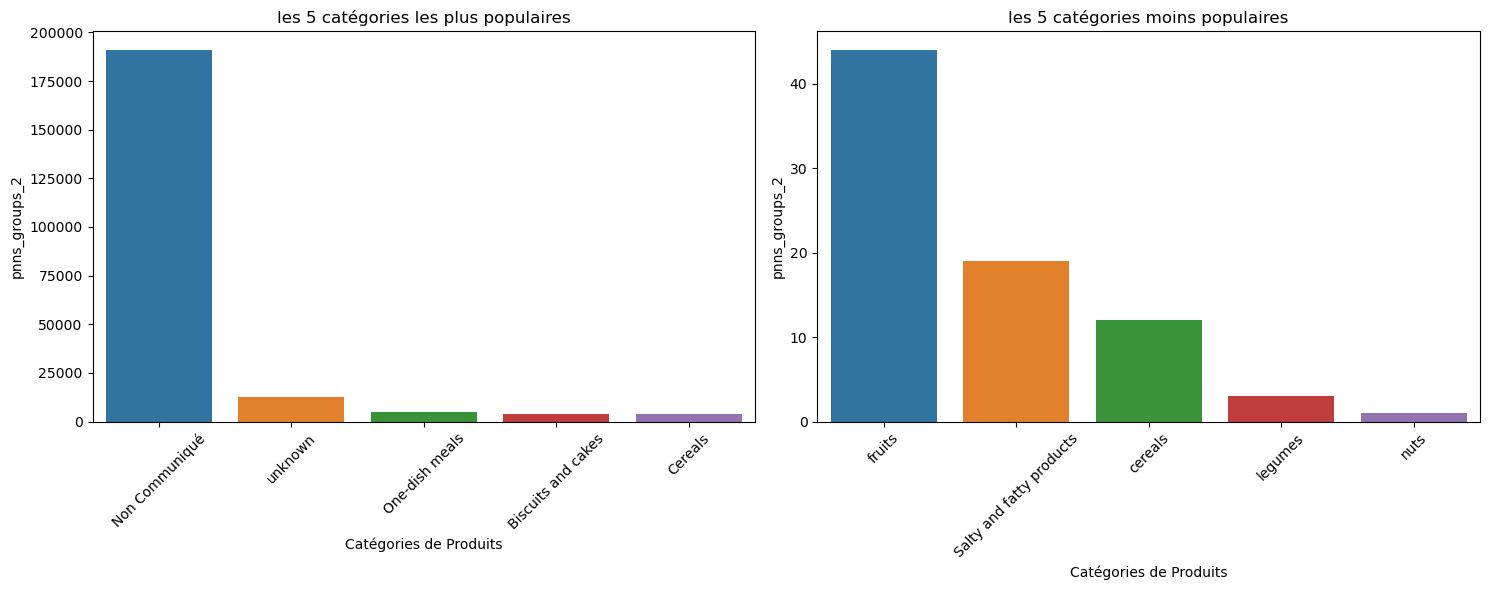

In [498]:
# Obtenir le nombre de produits par catégories:
produit_par_categories = Data_Final['pnns_groups_2'].value_counts().to_frame().reset_index()

# Créer une figure et définir la taille
plt.figure(figsize=(15, 6))

# Premier graphique à gauche pour les 5 catégories les plus populaires
plt.subplot(121)
sns.barplot(data=produit_par_categories.head(5), x='index', y='pnns_groups_2')
plt.xticks(rotation=45)
plt.title("les 5 catégories les plus populaires")
plt.xlabel('Catégories de Produits')

# Deuxième graphique à droite pour les 5 catégories moins populaires
plt.subplot(122)
sns.barplot(data=produit_par_categories.tail(5), x='index', y='pnns_groups_2')
plt.xticks(rotation=45)
plt.title("les 5 catégories moins populaires")
plt.xlabel('Catégories de Produits')

# Afficher le graphique
plt.tight_layout()  # Pour éviter que les étiquettes se chevauchent
plt.show()

- **Les plats préparés, les biscuits et les céréales sont parmi les produits les plus fréquents.**
- **Une des céréales est orthographiée différemment, ce qui explique la variété de noms observée.**

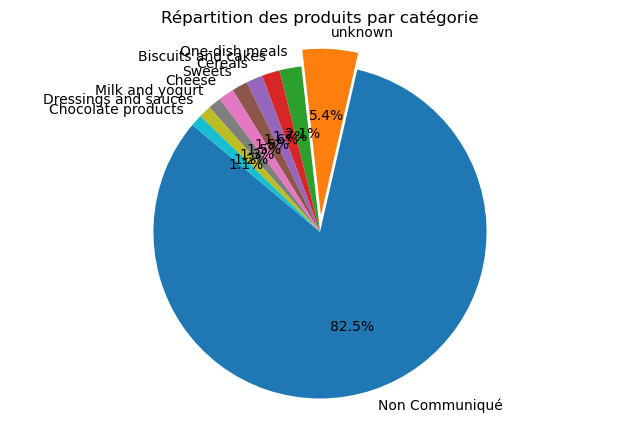

In [499]:
# Données pour le graphique en tarte
labels = produit_par_categories['index'].head(10)
sizes = produit_par_categories['pnns_groups_2'].head(10)
explode = [0, 0.1, 0, 0, 0, 0, 0, 0, 0, 0]  # Explosion pour la deuxième catégorie

# Créer le graphique en tarte
plt.figure(figsize=(8, 5))  # Taille de la figure
plt.pie(sizes, labels=labels, explode=explode, autopct='%1.1f%%', startangle=140)

# Ajuster l'aspect du graphique
plt.axis('equal')  # Assure que le graphique est un cercle plutôt qu'une ellipse

# Titre
plt.title("Répartition des produits par catégorie")

# Afficher le graphique
plt.show()

- **Pour savourer une part de tarte parmi les gâteaux**

In [500]:
# Afficher le nombre de catégories uniques et les noms de ces catégories avant la modification
print("Nombre de catégories uniques avant la modification :", Data_Final['pnns_groups_2'].nunique())
print("Catégories uniques avant la modification :", Data_Final['pnns_groups_2'].unique())

# Modifier les noms de groupes pour les mettre en majuscule
# Utilisation de la méthode str.capitalize() pour mettre en majuscule la première lettre de chaque mot
Data_Final['pnns_groups_2'] = Data_Final['pnns_groups_2'].str.capitalize()
print()

# Afficher le nombre de catégories uniques et les noms de ces catégories après la modification
print("Nombre de catégories uniques après la modification :", Data_Final['pnns_groups_2'].nunique())
print("Catégories uniques après la modification :", Data_Final['pnns_groups_2'].unique())

Nombre de catégories uniques avant la modification : 43
Catégories uniques avant la modification : ['Non Communiqué' 'unknown' 'Dressings and sauces' 'Sweets'
 'Fish and seafood' 'Fruit juices' 'Sweetened beverages' 'Milk and yogurt'
 'One-dish meals' 'Non-sugared beverages' 'Chocolate products'
 'Alcoholic beverages' 'Cereals' 'Cheese' 'Fats' 'Legumes' 'Dried fruits'
 'Biscuits and cakes' 'Artificially sweetened beverages' 'Vegetables'
 'Meat' 'Ice cream' 'Nuts' 'Pizza pies and quiche' 'Appetizers'
 'Processed meat' 'vegetables' 'Bread' 'Breakfast cereals' 'Eggs' 'Fruits'
 'Potatoes' 'pastries' 'Dairy desserts' 'Soups' 'Sandwich' 'Fruit nectars'
 'fruits' 'Tripe dishes' 'Salty and fatty products' 'cereals' 'legumes'
 'nuts']

Nombre de catégories uniques après la modification : 38
Catégories uniques après la modification : ['Non communiqué' 'Unknown' 'Dressings and sauces' 'Sweets'
 'Fish and seafood' 'Fruit juices' 'Sweetened beverages' 'Milk and yogurt'
 'One-dish meals' 'Non-sugare

- **cinq (5) catégories étaient mal écrites, sans la première lettre en majuscule : nuts, legumes, cereals, pastries, vegetables.**

In [501]:
"""
# Sélectionner les colonnes de type 'object'
colonnes_object = Data_Final.select_dtypes('object')

# Remplir les valeurs manquantes des colonnes sélectionnées avec "Non Communiqué"
Data_Final[colonnes_object.columns] = colonnes_object.fillna("Non Communiqué")  """

'\n# Sélectionner les colonnes de type \'object\'\ncolonnes_object = Data_Final.select_dtypes(\'object\')\n\n# Remplir les valeurs manquantes des colonnes sélectionnées avec "Non Communiqué"\nData_Final[colonnes_object.columns] = colonnes_object.fillna("Non Communiqué")  '

In [502]:
# Supprimer les colonnes entièrement vides
Data_Final = Data_Final.dropna(axis=1, how='all')

# Afficher la nouvelle forme du dataframe après la suppression
print("Nouvelle forme du dataframe après la suppression des colonnes vides :", Data_Final.shape)

Nouvelle forme du dataframe après la suppression des colonnes vides : (259206, 21)


- **À ce stade, il reste 218341 produits et 21 colonnes dans le jeu de données.**

In [503]:
# Activation de l'affichage complet des contenus des cellules
pd.set_option('display.max_colwidth', None)

# Processus de nettoyage
# Création d'une liste contenant les informations de l'étape 9
etape9 = ['Etape 9', 'Traitement des colonnes textuelles et élimination des produits sans groupe PNNS2', Data_Final.shape[1], 
          Data_Final.shape[0], # Nombre total de colonnes avant la suppression
          round((Data_Final.isna().sum().sum())*100/(Data_Final.shape[0]*Data_Final.shape[1]))]   # Calcul du pourcentage de NaN

# Conversion de la liste en DataFrame avec les bonnes colonnes
etape9 = pd.DataFrame([etape9], columns=['Etapes', 'Action', 'Nb_Colonne', 'Nb_Ligne', 'Pourcentage_NaN'])

# Ajout de l'étape au DataFrame df_processus_nettoyage
df_processus_nettoyage = df_processus_nettoyage.append(etape9, ignore_index=True)

# Afficher le DataFrame mis à jour
df_processus_nettoyage

,Etapes,Action,Nb_Colonne,Nb_Ligne,Pourcentage_NaN
0,Etape 1,Ouverture du Fichier,162,320772,76
1,Etape 2,"Suppression des colonnes ayant moins de 50% de leur valeur rempli, sauf 'pnns_groups_1', 'pnns_groups_2'",36,320772,17
2,Etape 3,Suppression des lignes ne contenant pas d'informations sur les ingrédients,36,262768,9
3,Etape 4,Analyse des variables pour les informations générales,31,259380,11
4,Etape 5,Analyse des variables tags,28,259380,12
5,Etape 6,Analyse des variables Igredients,28,259380,12
6,Etape 7,Analyse des variables Données diverses,22,259380,10
7,Etape 8,Analyse des variables apports nutritionnels,21,259206,10
8,Etape 9,Traitement des colonnes textuelles et élimination des produits sans groupe PNNS2,21,259206,4


## V- Création de l'EnvironnementScore/grade :
Pour chaque paramètre parmi les 6, les scores sont attribués comme suit :

1 : Très Bon

0.3 : Non Communiqué

0 : Très Mauvais
### Impact environnemental des aliments transformés :
D'après une étude publiée par le magazine 60 millions de consommateurs en juin/juillet 2020, ainsi qu'une recherche australienne de janvier 2019, la consommation d'aliments ultratransformés contribue à plus d'un tiers des impacts environnementaux liés à l'alimentation. En France, l'empreinte carbone des produits alimentaires industriels s'élève à environ 9,1 millions de tonnes de CO2, sans compter le transport. Les produits avec les plus forts impacts en termes de consommation d'énergie et d'émissions sont les pommes de terre transformées (purée, chips, frites, ...), les boissons alcoolisées distillées, les plats préparés et le sucre.

In [504]:
# Fonction pour attribuer un score en fonction de la quantité d'additifs
def score_additifs(value):
    if value <= 3 :
        return 1
    if value > 3 and value <= 10:
        return 0.1
    if value > 10:
        return 0
    else:
        return 0.3

# Appliquer la fonction à la colonne 'additives_n' pour créer une nouvelle colonne 'Nb_Additifs'
Data_Final['Nb_Additifs'] = Data_Final['additives_n'].apply(score_additifs)

In [505]:
# 1 pas d'huile de Palme
# 0 pour non communiqué
# -1 ou -2 si présence

# Calcul de la présence d'huile de palme dans les ingrédients
Data_Final['Huile_De_Palme'] = Data_Final['ingredients_from_palm_oil_n'] + Data_Final['ingredients_that_may_be_from_palm_oil_n']

# Suppression des colonnes d'origine
Data_Final.drop(['ingredients_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil_n'], axis=1, inplace=True)

# Fonction pour attribuer un score en fonction de la quantité d'huile de palme
def score_huile_palme(value):
    if value == 0:
        return 1
    if value > 0 and value <3:
        return 0.1
    if value >= 3:
        return 0
    else:
        return 0.3

# Appliquer la fonction à la colonne 'HuileDePalme'
Data_Final['Huile_De_Palme'] = Data_Final['Huile_De_Palme'].apply(score_huile_palme)

### 1- Quelles variables sont utilisées pour créer le Nutriscore ?

**Objectif** : réduire le nombre de variables tout en conservant celles les plus pertinentes pour le calcul du Nutriscore.
Selon des sources en ligne, les variables les plus pertinentes pour le calcul du Nutriscore sont les teneurs pour 100g ou 100ml de :
   - Acides gras saturés
   - Sucres
   - Sel (également appelé sodium dans certaines préparations)
   - Protéines
   - Fibres

In [506]:
# Sélectionner les variables quantitatives
variables_quantitatives = Data_Final.select_dtypes(exclude=('object'))

# Calculer le pourcentage de remplissage et Trier par ordre décroissant 
pourcentage_remplissage = (variables_quantitatives.notna().mean() * 100).round(2).sort_values(ascending=False)

# Filtrer pour ne garder que les variables avec plus de 60% de remplissage et prendre les 20 premières
variables_restantes = pourcentage_remplissage[pourcentage_remplissage > 60].head(20)

# Afficher les variables quantitatives restantes avec leur pourcentage de remplissage
variables_restantes = pd.DataFrame(variables_restantes, columns=['Pourcentage Remplissage'])
variables_restantes

,Pourcentage Remplissage
Nutrigrade,100.00
Nb_Additifs,100.00
Huile_De_Palme,100.00
energy_100g,99.38
proteins_100g,98.93
salt_100g,97.36
sodium_100g,97.34
sugars_100g,93.27
fat_100g,92.75
carbohydrates_100g,92.63


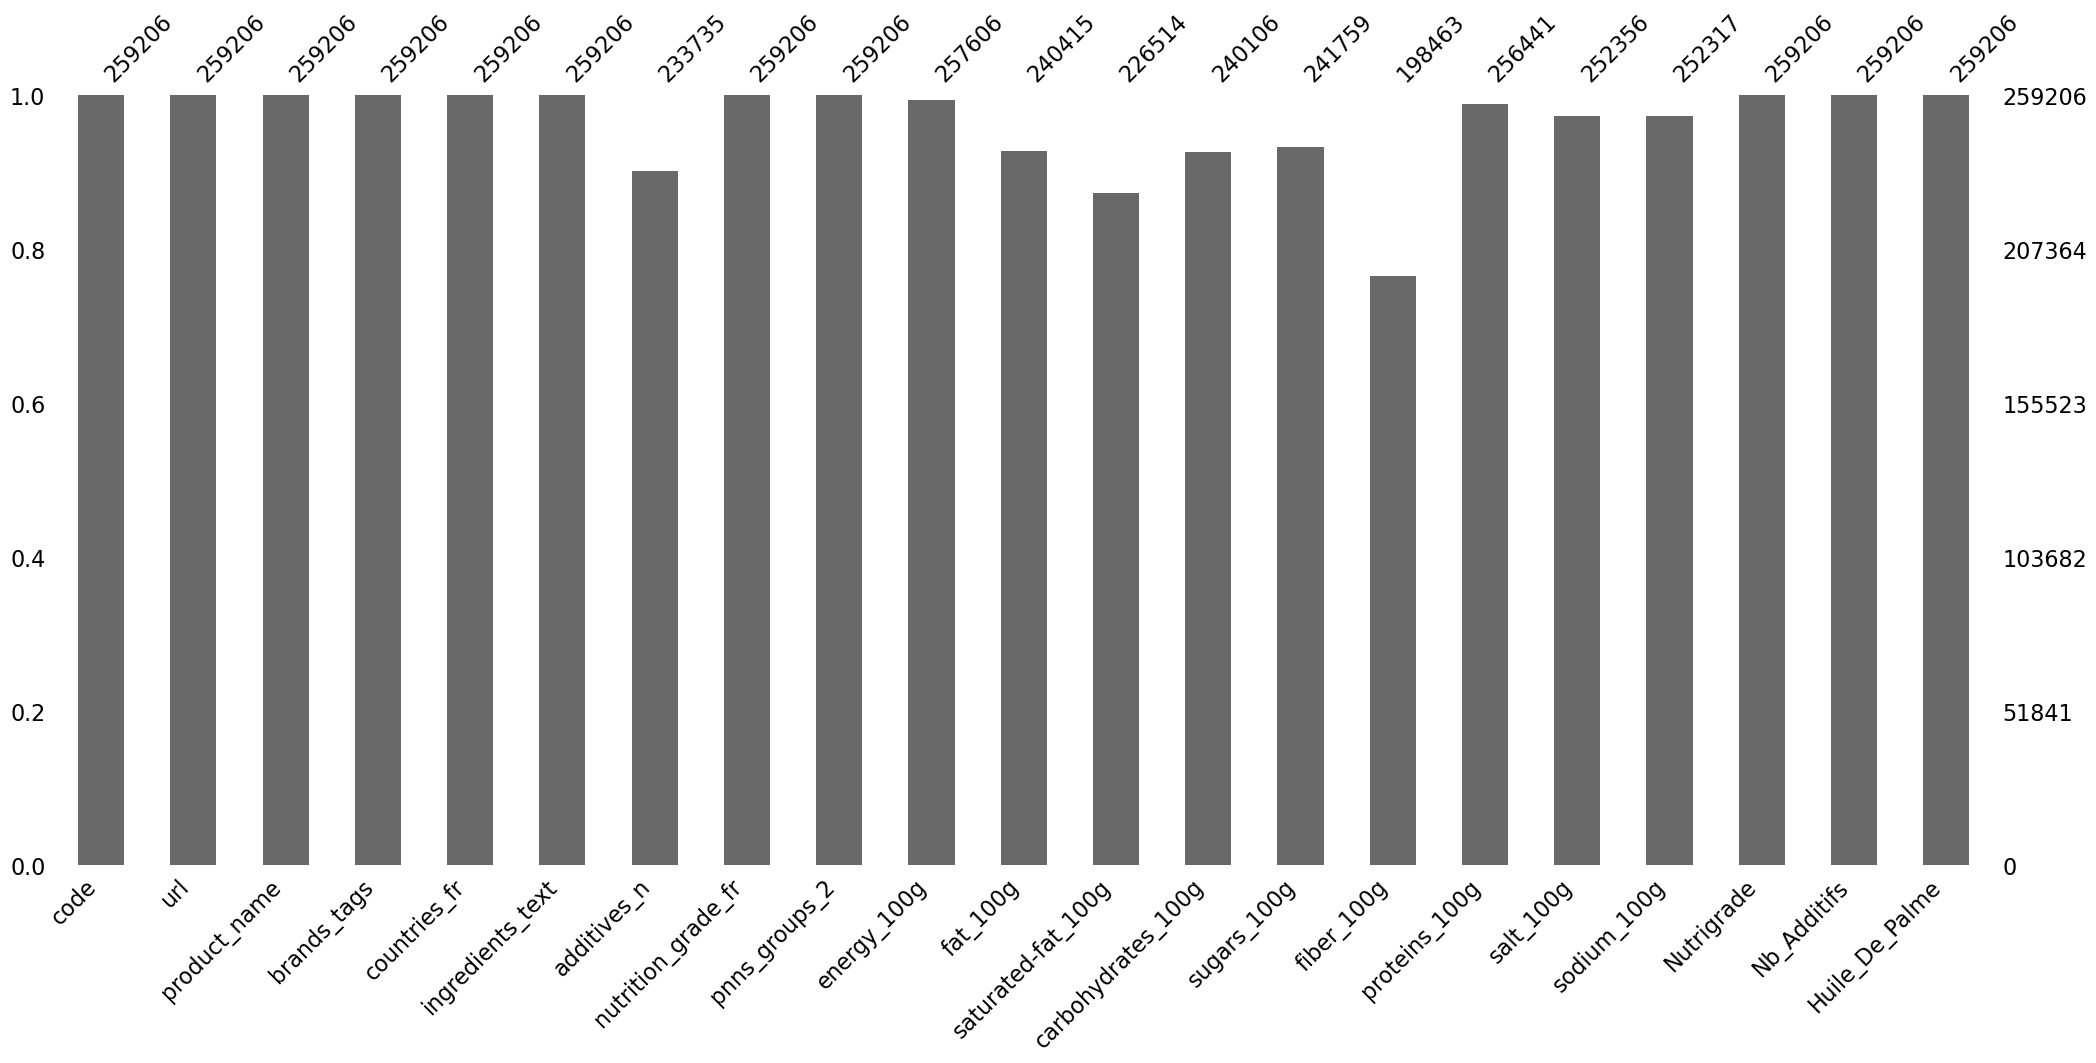

In [507]:
# Afficher le graphique des données manquantes
msno.bar(Data_Final)
plt.show()

- **Après avoir examiné les taux de remplissage, j'ai constaté que les cinq composantes du Nutri-Score sont présentes dans plus de 76% de remplissage des données.**
- **Je vais donc conserver les colonnes qui ont un taux de remplissage supérieur à 60%, et je pourrai ensuite éliminer les colonnes restantes qui ne sont pas nécessaires.**

In [508]:
# Colonnes à garder dans le DataFrame final
colonnes_gardees = ["code","url","product_name","brands_tags","countries_fr","ingredients_text",
                    "nutrition_grade_fr","pnns_groups_2","energy_100g","fat_100g","saturated-fat_100g",
                    "carbohydrates_100g","sugars_100g","fiber_100g","proteins_100g","salt_100g",
                    "sodium_100g","Nutrigrade","Nb_Additifs","Huile_De_Palme"]

# Sélectionner uniquement les colonnes à garder dans le DataFrame final
Data_Final = Data_Final[colonnes_gardees]

# rétirer: "additives_n"

In [509]:
# Activation de l'affichage complet des contenus des cellules
pd.set_option('display.max_colwidth', None)

# Processus de nettoyage
# Création d'une liste contenant les informations de l'étape 10
etape10 = ['Etape 10', "Génération des variables associées à l'EnvironnementScore.", Data_Final.shape[1], 
          Data_Final.shape[0], # Nombre total de colonnes avant la suppression
          round((Data_Final.isna().sum().sum())*100/(Data_Final.shape[0]*Data_Final.shape[1]))]   # Calcul du pourcentage de NaN

# Conversion de la liste en DataFrame avec les bonnes colonnes
etape10 = pd.DataFrame([etape10], columns=['Etapes', 'Action', 'Nb_Colonne', 'Nb_Ligne', 'Pourcentage_NaN'])

# Ajout de l'étape au DataFrame df_processus_nettoyage
df_processus_nettoyage = df_processus_nettoyage.append(etape10, ignore_index=True)

# Afficher le DataFrame mis à jour
df_processus_nettoyage

,Etapes,Action,Nb_Colonne,Nb_Ligne,Pourcentage_NaN
0,Etape 1,Ouverture du Fichier,162,320772,76
1,Etape 2,"Suppression des colonnes ayant moins de 50% de leur valeur rempli, sauf 'pnns_groups_1', 'pnns_groups_2'",36,320772,17
2,Etape 3,Suppression des lignes ne contenant pas d'informations sur les ingrédients,36,262768,9
3,Etape 4,Analyse des variables pour les informations générales,31,259380,11
4,Etape 5,Analyse des variables tags,28,259380,12
5,Etape 6,Analyse des variables Igredients,28,259380,12
6,Etape 7,Analyse des variables Données diverses,22,259380,10
7,Etape 8,Analyse des variables apports nutritionnels,21,259206,10
8,Etape 9,Traitement des colonnes textuelles et élimination des produits sans groupe PNNS2,21,259206,4
9,Etape 10,Génération des variables associées à l'EnvironnementScore.,20,259206,3


In [510]:
# Liste des variables nutritives
#ingredients = ["energy_100g","fat_100g","saturated-fat_100g","carbohydrates_100g","sugars_100g","fiber_100g",
              # "proteins_100g","salt_100g","sodium_100g"]

# Les NaN sont remplacés par 0, en supposant que les valeurs manquantes ne sont pas 
   # simplement référencées pour chaque produit."
#Data_Final[ingredients] = Data_Final[ingredients].fillna(0)

# Data_Final.head(2)

In [511]:
from sklearn.impute import KNNImputer

# Les variables quantitatives à traiter
ingredients = ["energy_100g", "fat_100g", "saturated-fat_100g", "carbohydrates_100g","sugars_100g", "fiber_100g",
               "proteins_100g", "salt_100g", "sodium_100g"]

# Création de l'imputeur KNN avec un voisinage de 5
imputer = KNNImputer(n_neighbors=5)

# Remplissage des valeurs manquantes
Data_Final[ingredients] = imputer.fit_transform(Data_Final[ingredients])

In [512]:
# Sélectionner les colonnes de type 'object'
colonnes_object = Data_Final.select_dtypes(include='object').columns

# Remplacer "Non Communiqué" par pd.NA (valeur manquante)
Data_Final[colonnes_object] = Data_Final[colonnes_object].replace("Non Communiqué", pd.NA)

# Supprimer les lignes avec des valeurs manquantes dans les colonnes de type 'object'
# Cela va supprimer les lignes qui avaient "Non Communiqué" dans au moins une colonne de type 'object'
Data_Final = Data_Final.dropna(subset=colonnes_object).reset_index(drop=True)

# Afficher les valeurs uniques après suppression
# Cela permet de vérifier qu'il n'y a plus de "Non Communiqué" dans les colonnes 'object'
valeurUnique = Data_Final[colonnes_object].value_counts(dropna=False)

In [513]:
# Activation de l'affichage complet des contenus des cellules
pd.set_option('display.max_colwidth', None)

# Processus de nettoyage
# Création d'une liste contenant les informations de l'étape 11
etape11 = ['Etape 11', "Utilisation de la méthode KNN pour remplir les colonnes quantitatives et suppression des ligne avec 'Nom Communiqué'.", Data_Final.shape[1], 
          Data_Final.shape[0], # Nombre total de colonnes avant la suppression
          round((Data_Final.isna().sum().sum())*100/(Data_Final.shape[0]*Data_Final.shape[1]))]   # Calcul du pourcentage de NaN

# Conversion de la liste en DataFrame avec les bonnes colonnes
etape11 = pd.DataFrame([etape11], columns=['Etapes', 'Action', 'Nb_Colonne', 'Nb_Ligne', 'Pourcentage_NaN'])

# Ajout de l'étape au DataFrame df_processus_nettoyage
df_processus_nettoyage = df_processus_nettoyage.append(etape11, ignore_index=True)

# Afficher le DataFrame mis à jour
df_processus_nettoyage

,Etapes,Action,Nb_Colonne,Nb_Ligne,Pourcentage_NaN
0,Etape 1,Ouverture du Fichier,162,320772,76
1,Etape 2,"Suppression des colonnes ayant moins de 50% de leur valeur rempli, sauf 'pnns_groups_1', 'pnns_groups_2'",36,320772,17
2,Etape 3,Suppression des lignes ne contenant pas d'informations sur les ingrédients,36,262768,9
3,Etape 4,Analyse des variables pour les informations générales,31,259380,11
4,Etape 5,Analyse des variables tags,28,259380,12
5,Etape 6,Analyse des variables Igredients,28,259380,12
6,Etape 7,Analyse des variables Données diverses,22,259380,10
7,Etape 8,Analyse des variables apports nutritionnels,21,259206,10
8,Etape 9,Traitement des colonnes textuelles et élimination des produits sans groupe PNNS2,21,259206,4
9,Etape 10,Génération des variables associées à l'EnvironnementScore.,20,259206,3


## VI- Exportation des fichiers

In [514]:
# Exporter les fichiers CSV
Data_Final.to_csv('Data_Final_1_projet3.csv', index=False)
df_processus_nettoyage.to_csv('df_processus_nettoyage_1_projet3.csv', index=False)

In [515]:
#   https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html